<a href="https://colab.research.google.com/github/sagile1996/AppliedProject52056/blob/main/data/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the data
url = "https://github.com/OfriA/AppliedProject52056/raw/refs/heads/main/data/ER_data.xlsx"
data = pd.read_excel(url)

data.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,pba17,pba18,pba19,pba20,pba21,pba22,pba23,publication,publication_1_TEXT,notes
0,2023-11-10 05:03:59,2023-11-10 05:18:24,0,77.137.72.8,100,864,1,2023-11-10 05:18:24.970,R_2zx6JDdyuRWIFe7,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
1,2023-11-11 11:48:18,2023-11-11 12:05:28,0,89.139.151.60,100,1030,1,2023-11-11 12:05:29.243,R_87VewwKW25MdOWR,NaN,...,0.0,0.0,0.0,0.0,2.0,1.0,0.0,NaN,NaN,אספקט נוסף שתורם ללחץ משפחתי או כך שאנו מארחים...
2,2023-11-11 12:15:06,2023-11-11 12:28:18,0,77.137.65.231,100,791,1,2023-11-11 12:28:18.984,R_2UXkBlYFVZKykUc,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,לא
3,2023-11-11 12:32:33,2023-11-11 12:59:45,0,2.52.150.227,100,1631,1,2023-11-11 12:59:45.938,R_3NJoeQvJTS5YS4s,NaN,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
4,2023-11-11 13:21:15,2023-11-11 13:51:44,0,77.137.77.167,100,1829,1,2023-11-11 13:51:45.899,R_2wHVGst8nWwQV1c,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [3]:
print(data.columns)

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName',
       ...
       'pba17', 'pba18', 'pba19', 'pba20', 'pba21', 'pba22', 'pba23',
       'publication', 'publication_1_TEXT', 'notes'],
      dtype='object', length=344)


In [4]:
data[['Progress', 'Duration (in seconds)', 'sex', 'age', 'ed_level', 'ses', 'DAS_1', 'custody', 'n_children', 'child_age', 'child_gender', 'moved_Y/N', 'therapy', 'psych_drugs', 'health', 'partner_duty', 'alarms_freq', ]].describe()

,Progress,Duration (in seconds),sex,age,ed_level,ses,DAS_1,custody,n_children,child_age,child_gender,moved_Y/N,therapy,psych_drugs,health,partner_duty,alarms_freq
count,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,601.000000,28.000000,576.000000,576.000000,575.000000,659.000000,233.000000,233.000000,233.000000,578.000000,579.000000
mean,89.484067,10055.652504,1.802731,38.078907,3.509863,3.396055,5.707155,1.678571,2.314236,6.751736,1.483478,1.905918,2.742489,2.789700,3.845494,1.904844,2.711572
std,19.519945,46669.795908,0.398239,7.934180,0.660070,1.300941,1.320643,0.818923,1.208753,4.635121,0.500162,0.292164,0.638389,0.589766,0.810592,0.600067,1.509390
min,32.000000,104.000000,1.000000,7.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,96.000000,932.000000,2.000000,33.000000,3.000000,3.000000,5.000000,1.000000,1.000000,3.000000,1.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000
50%,96.000000,1386.000000,2.000000,37.000000,4.000000,3.000000,6.000000,1.000000,2.000000,6.000000,1.000000,2.000000,3.000000,3.000000,4.000000,2.000000,3.000000
75%,97.000000,2187.000000,2.000000,43.000000,4.000000,5.000000,7.000000,2.000000,3.000000,9.250000,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,4.000000
max,100.000000,560024.000000,2.000000,99.000000,4.000000,5.000000,7.000000,3.000000,8.000000,18.000000,2.000000,2.000000,3.000000,3.000000,5.000000,4.000000,5.000000


<Axes: >

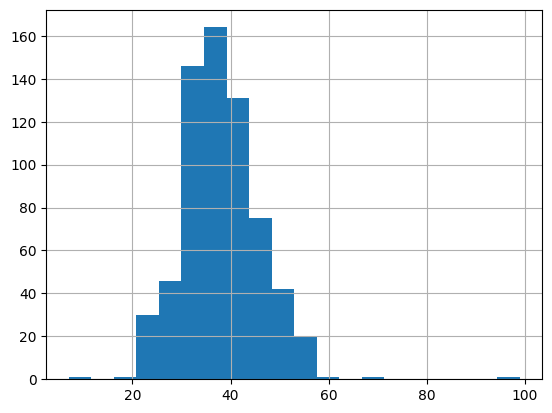

In [5]:
data.age.hist(bins=20)

<Axes: >

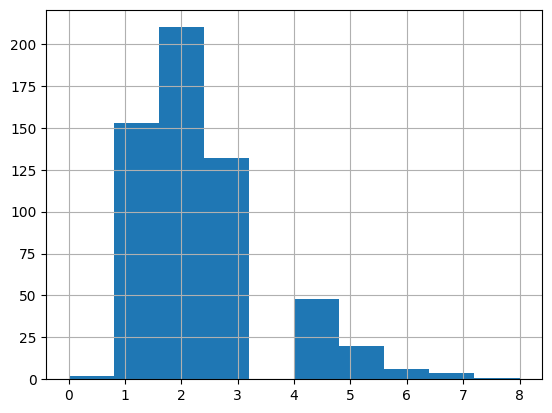

In [6]:
data.n_children.hist()

In [7]:
import seaborn as sns

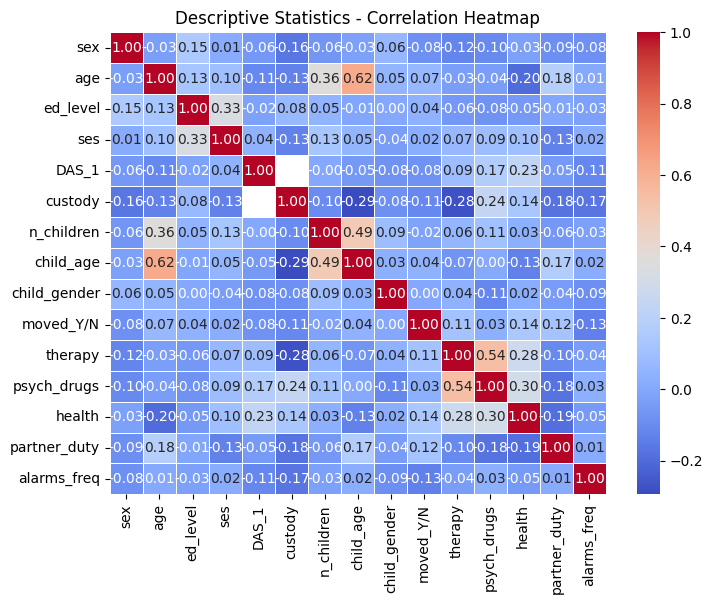

In [8]:
descriptive_corr = data[['sex', 'age', 'ed_level', 'ses', 'DAS_1', 'custody', 'n_children', 'child_age', 'child_gender', 'moved_Y/N', 'therapy', 'psych_drugs', 'health', 'partner_duty', 'alarms_freq', ]].corr()

# Create the heatmap
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(descriptive_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Descriptive Statistics - Correlation Heatmap')
plt.show()

In [9]:
# War exposure features
self_exposure_features = ['SelfExposure_1', 'SelfExposure_2', 'SelfExposure_3', 'SelfExposure_4', 'SelfExposure_5', 'SelfExposure_6']
other_exposure_features = ['OtherExposure_6', 'OtherExposure_7', 'OtherExposure_8', 'OtherExposure_9', 'OtherExposure_10', 'OtherExposure_11', 'OtherExposure_12']

# Commpute war exposure score
data['self_exposure_score'] = np.sum(data[self_exposure_features], axis=1)
data['other_exposure_score'] = np.sum(data[other_exposure_features], axis=1)
data['war_exposure_score'] = np.sum(data[['self_exposure_score', 'other_exposure_score']], axis=1)

In [10]:
# CBCL features
CBCL_features = data.columns[240:283].to_list()

CBCL_D_features = CBCL_features[0:13]
CBCL_A_features = CBCL_features[13:31]
CBCL_S_features = CBCL_features[31:]


# Compute CBCL score
data['CBCL_D_score'] = np.sum(data[CBCL_D_features], axis=1)
data['CBCL_A_score'] = np.sum(data[CBCL_A_features], axis=1)
data['CBCL_S_score'] = np.sum(data[CBCL_S_features], axis=1)
data['CBCL_score'] = np.sum(data[['CBCL_D_score', 'CBCL_A_score', 'CBCL_S_score']], axis=1)

In [11]:
data.iloc[:, 240:283]

,CBCL_D1,CBCL_D2,CBCL_D3,CBCL_D4,CBCL_D5,CBCL_D6,CBCL_D7,CBCL_D8,CBCL_D9,CBCL_D10,...,CBCL_S3,CBCL_S4,CBCL_S5,CBCL_S6,CBCL_S7,CBCL_S8,CBCL_S9,CBCL_S10,CBCL_S11,CBCL_S12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data.shape

(659, 351)

In [13]:
# Compute length of texts
data['Event_length'] = data['Event'].str.len()
data['EER_text_length'] = data['EER_text'].str.len()

data['EER_text_length'] = data['EER_text_length'].fillna(0)


In [14]:
print(f"Event length mean: {data['Event_length'].mean():.5}, Event length SD: {data['Event_length'].std():.5}")
print(f"EER text length mean: {data['EER_text_length'].mean():.5}, EER text length SD: {data['EER_text_length'].std():.5}")

Event length mean: 124.44, Event length SD: 101.91
EER text length mean: 85.338, EER text length SD: 113.42


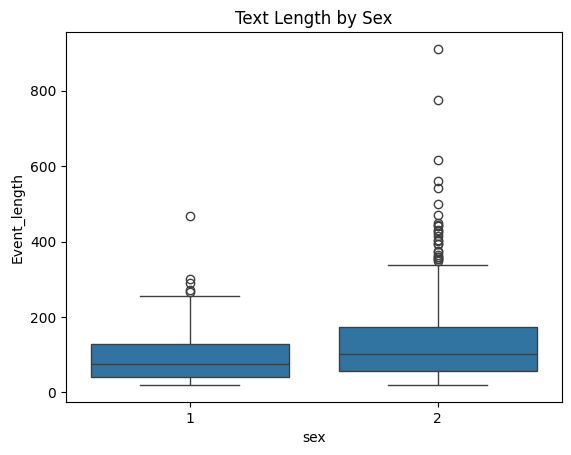

In [15]:
sns.boxplot(data=data, x='sex', y='Event_length')
plt.title("Text Length by Sex")
plt.show()

In [16]:
# Omitting NA's
data = data[np.sum(data[self_exposure_features + other_exposure_features + CBCL_features].isna(), axis=1) == 0]

In [17]:
data.shape

(363, 353)

In [18]:
data['child_age'] = np.int16(data['child_age'])

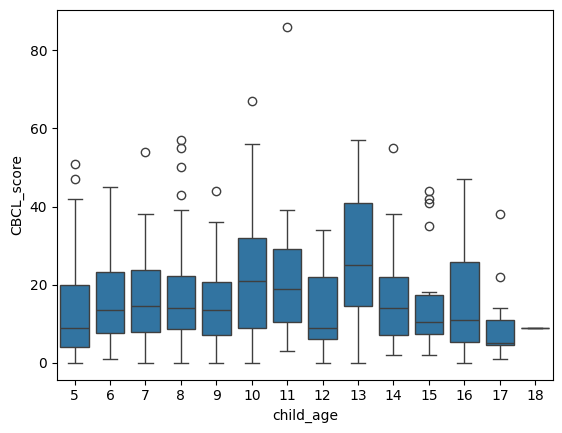

In [19]:
ax = sns.boxplot(data=data, x='child_age', y='CBCL_score')



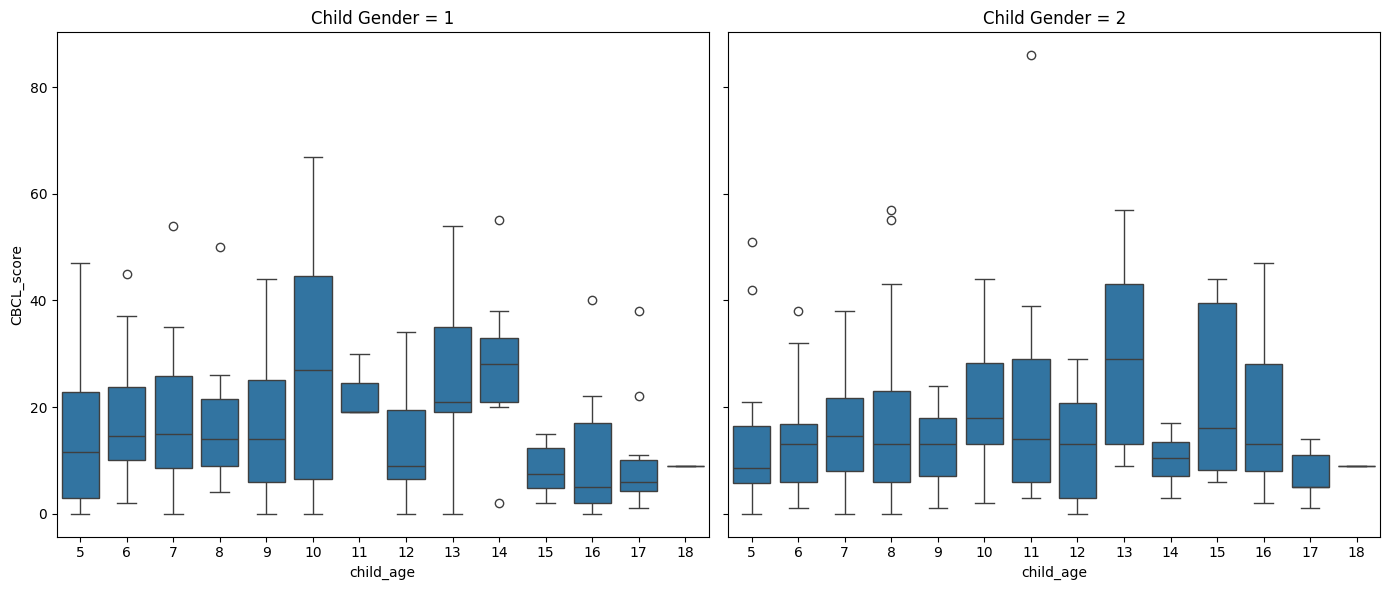

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# child_gender == 1
sns.boxplot(
    data=data[data['child_gender'] == 1],
    x='child_age', y='CBCL_score',
    ax=axes[0]
)
axes[0].set_title('Child Gender = 1')

# child_gender == 2
sns.boxplot(
    data=data[data['child_gender'] == 2],
    x='child_age', y='CBCL_score',
    ax=axes[1]
)
axes[1].set_title('Child Gender = 2')

plt.tight_layout()
plt.show()

In [21]:
print(f"CBCL mean: {data['CBCL_score'].mean():.5}, CBCL SD: {data['CBCL_score'].std():.5}")
print(f"CBCL D mean: {data['CBCL_D_score'].mean():.5}, CBCL D SD: {data['CBCL_D_score'].std():.5}")
print(f"CBCL A mean: {data['CBCL_A_score'].mean():.5}, CBCL A SD: {data['CBCL_A_score'].std():.5}")
print(f"CBCL S mean: {data['CBCL_S_score'].mean():.5}, CBCL S SD: {data['CBCL_S_score'].std():.5}")


CBCL mean: 16.62, CBCL SD: 13.912
CBCL D mean: 6.5372, CBCL D SD: 4.9929
CBCL A mean: 7.5372, CBCL A SD: 7.398
CBCL S mean: 2.5455, CBCL S SD: 3.6345


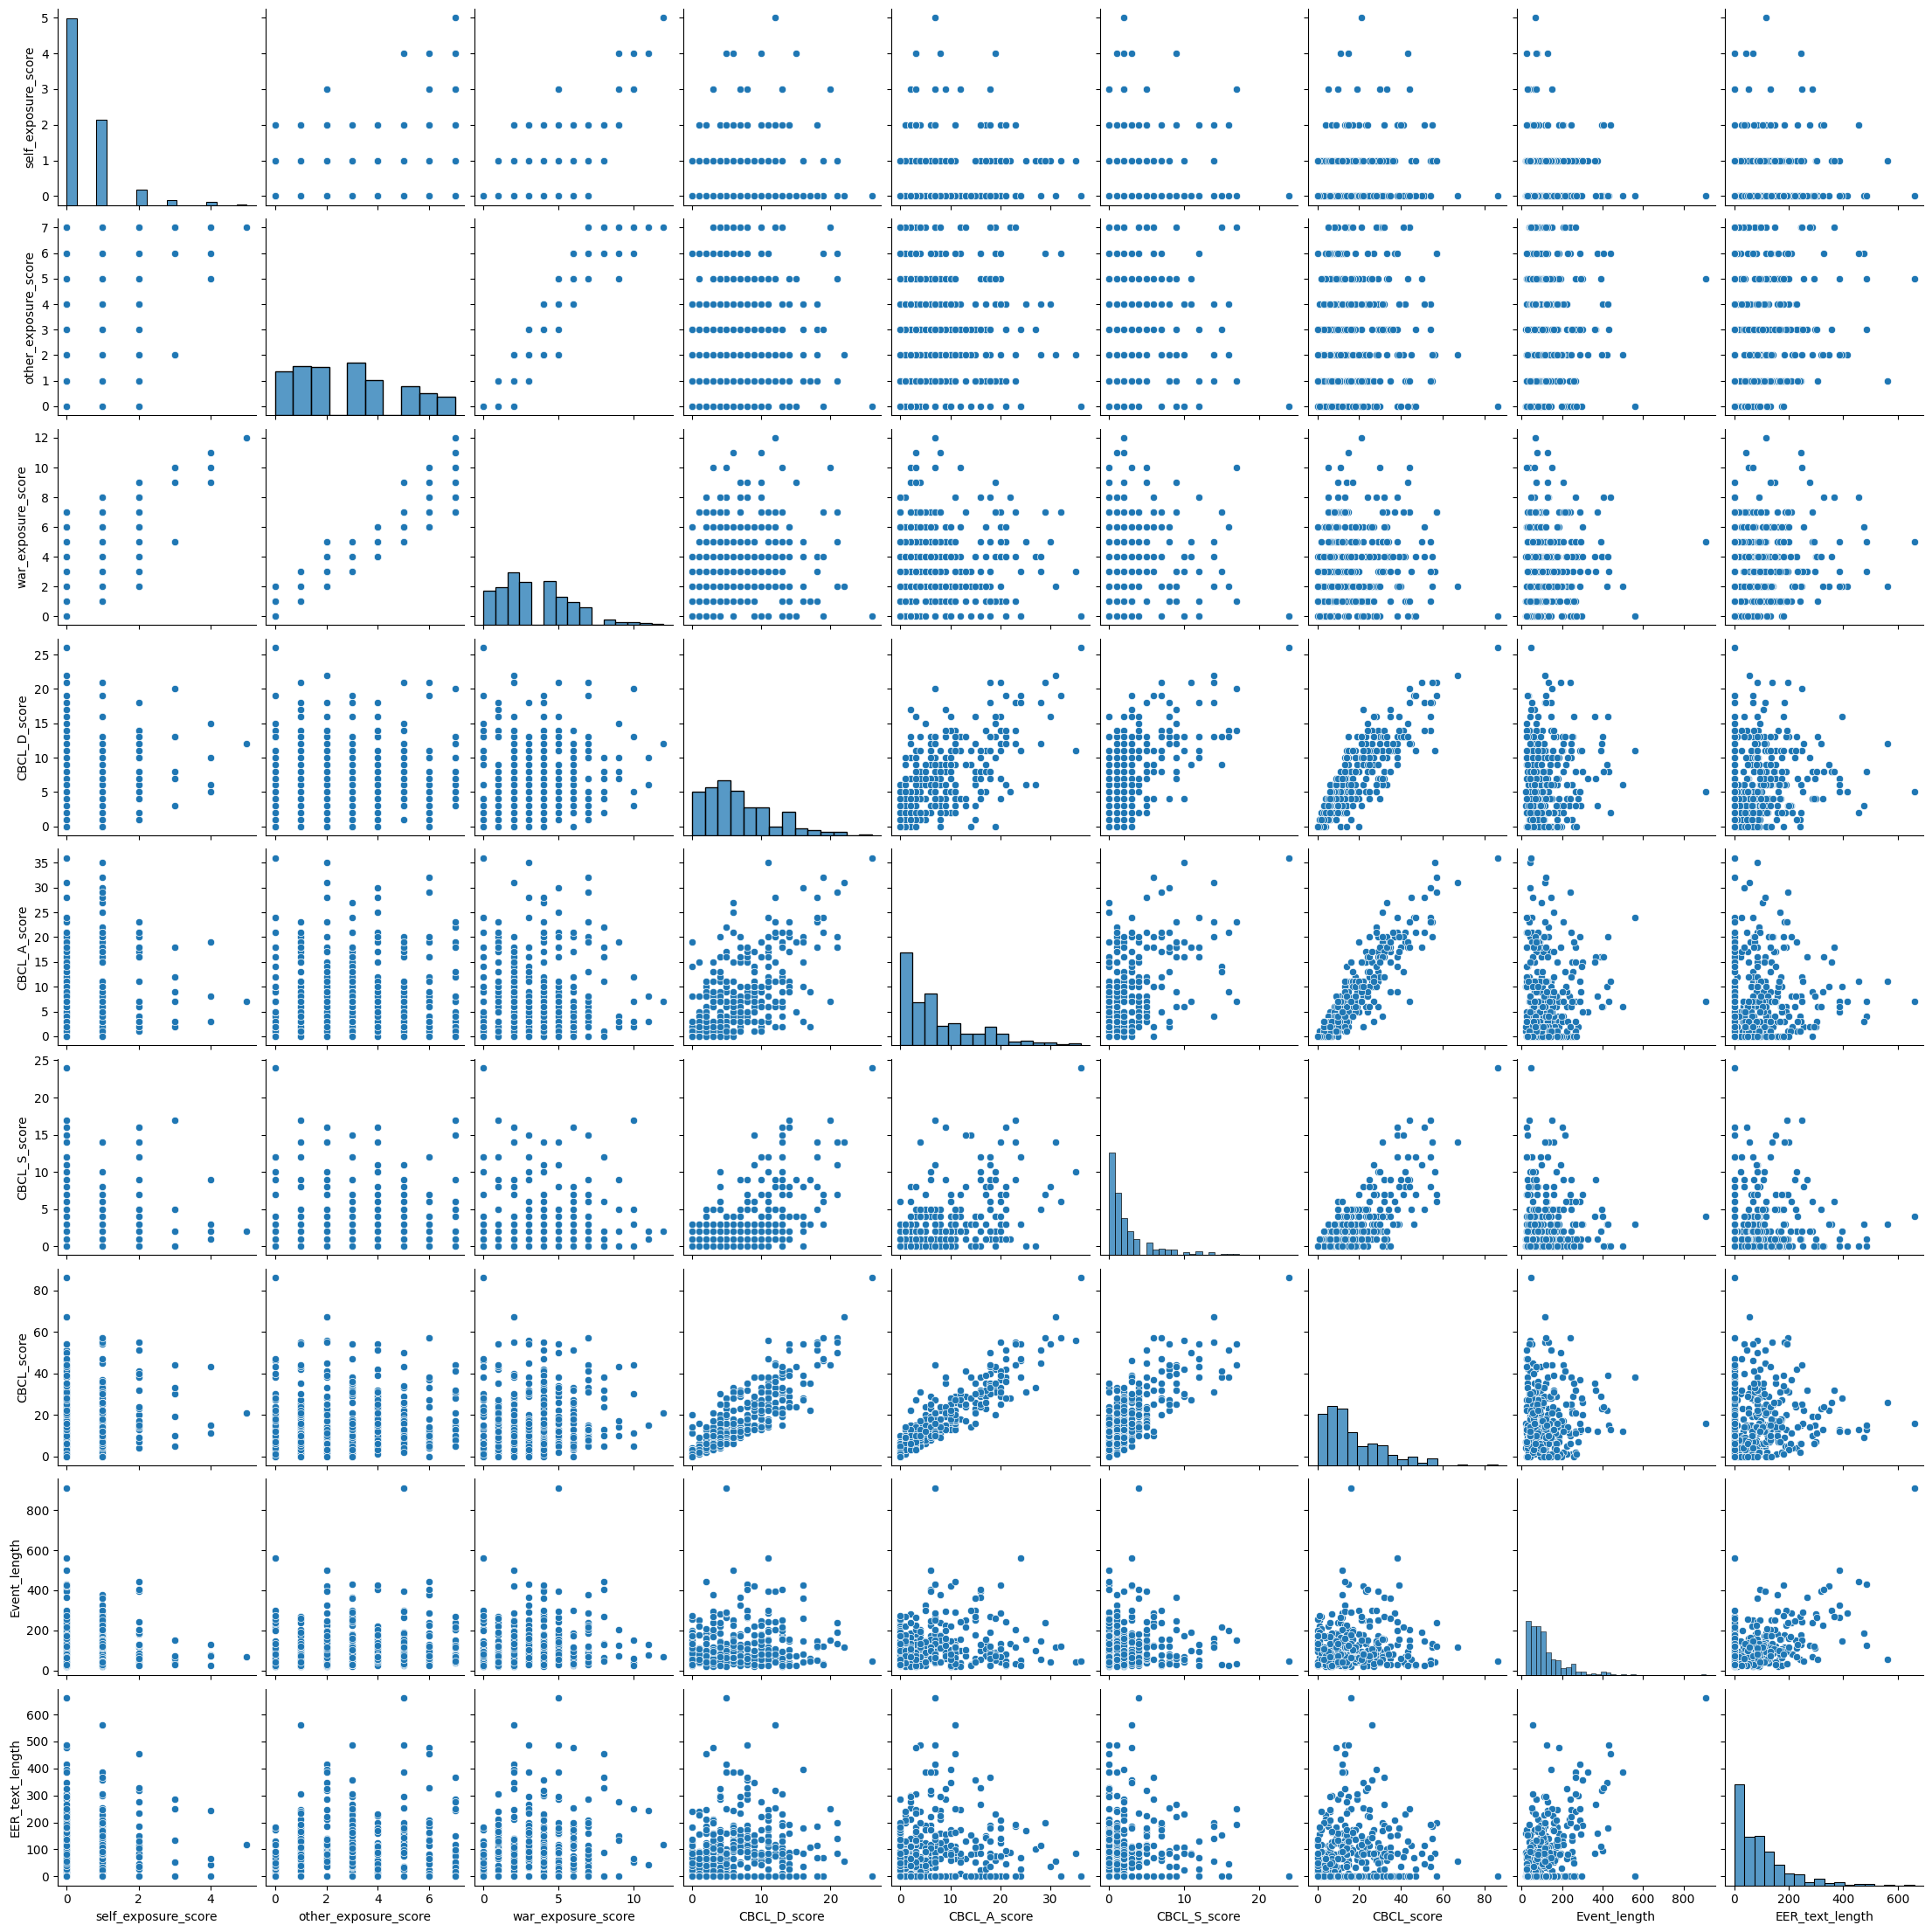

In [22]:
sns.pairplot(data[['self_exposure_score', 'other_exposure_score', 'war_exposure_score','CBCL_D_score', 'CBCL_A_score', 'CBCL_S_score', 'CBCL_score', 'Event_length', 'EER_text_length']])

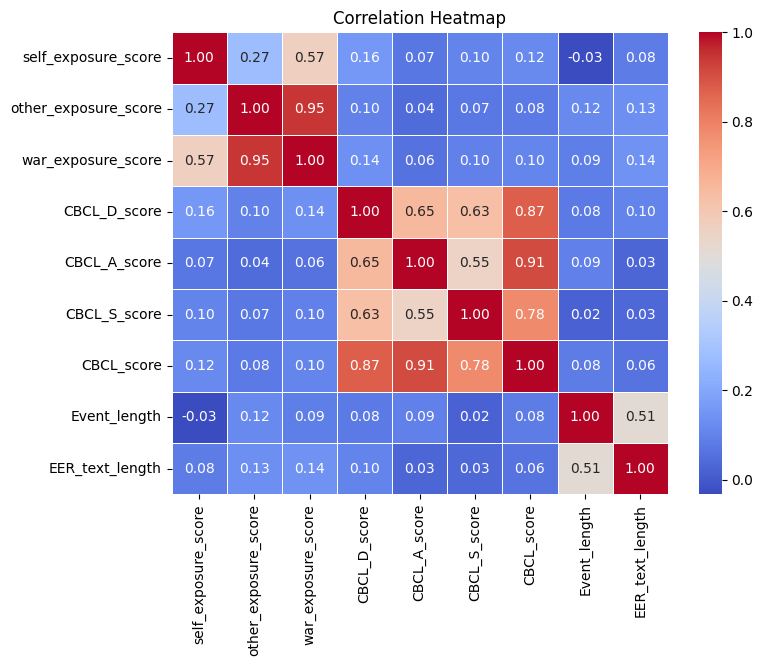

In [23]:
corr_matrix = data[['self_exposure_score', 'other_exposure_score', 'war_exposure_score','CBCL_D_score', 'CBCL_A_score', 'CBCL_S_score', 'CBCL_score', 'Event_length', 'EER_text_length']].corr()

# Create the heatmap
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [24]:
# 1. Install Stanza (Run this once)
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 49.3 MB/s eta 0:00:00


In [25]:
import stanza
import pandas as pd

# 2. Download the Hebrew model (Run this once)
# This downloads the pre-trained neural network for Hebrew
stanza.download('he')

# 3. Initialize the pipeline
# We need 'tokenize' (split words), 'mwt' (multi-word token expansion), and 'lemma' (base forms)
nlp = stanza.Pipeline(lang='he', processors='tokenize,mwt,pos,lemma', use_gpu=True)

# 4. Define the Lemmatization Function
def get_hebrew_lemmas(text):
    if not isinstance(text, str) or not text.strip():
        return []

    # Process the text with Stanza
    doc = nlp(text)

    lemmas = []
    # Stanza organizes text into sentences -> words
    for sent in doc.sentences:
        for word in sent.words:
            # 'word.lemma' is the base form (e.g., 'הלכנו' -> 'הלך')
            # We filter out punctuation manually if needed
            if word.upos != 'PUNCT':
                lemmas.append(word.lemma)
    return lemmas

# --- APPLY TO YOUR DATAFRAME ---
# Assuming your dataframe is called 'data' and the text column is 'text_column'

# (Replace 'text_column' with the actual name of your column, e.g., 'description')
column_name = 'Event'

# This might take a few minutes depending on the size of your data
print("Processing text... this may take a while for large datasets.")
data['lemmas'] = data[column_name].apply(get_hebrew_lemmas)

# --- INSPECT RESULTS ---
print(data[[column_name, 'lemmas']].head())

# Example of what this achieves:
# Input: "הילדים בכו כשהלכנו לממ"ד"
# Output (Lemmas): ['ה', 'ילד', 'בכה', 'כש', 'הלך', 'ל', 'ה', 'ממ"ד']
# Note how 'בכו' became 'בכה' and 'כשהלכנו' was split and normalized to 'הלך'.

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: he (Hebrew) ...


INFO:stanza:Downloaded file to /root/stanza_resources/he/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: he (Hebrew):
| Processor | Package           |
---------------------------------
| tokenize  | combined_nocharlm |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


Processing text... this may take a while for large datasets.
                                               Event  \
0  שיחקתי עם הבן שלי ואז צחק וחייך, והדבר היחיד ש...   
1  באמצע חגיגת יום הולדת ביתית לביתי בת ה6, אחותה...   
3  התיסכול בין לריב איתם על להיתחבר לזום להין לוו...   
4  נבהלתי מאוד מהאזעקות הרבות, הילדים הרגישו את ה...   
7  הרבה תסכול וחוסר אונים, מחשבות על הילדים הפרטי...   

                                              lemmas  
0  [שיחק, עם, ה, בן, של, הוא, ו, אז, צחק, ו, חייך...  
1  [ב, אמצע, חגיגה, יום, הולדת, ביתי, ל, בית, הוא...  
3  [ה, תסכול, בין, רב, את, הוא, על, נתחבר, ל, זום...  
4  [נבהל, מאוד, מ, ה, אזעקה, ה, רב, ה, ילד, הרגיש...  
7  [הרבה, תסכול, ו, חוסר, און, מחשבה, על, ה, ילד,...  


In [ ]:
data['lemmas'][1]

['ב',
 'אמצע',
 'חגיגה',
 'יום',
 'הולדת',
 'ביתי',
 'ל',
 'בית',
 'הוא',
 'בת',
 'ה',
 '6',
 'אחותה',
 'סיפר',
 'ל',
 'הוא',
 'על',
 'בן',
 'משפחה',
 'של',
 'חברה',
 'הוא',
 'ש',
 'נרצח',
 'ו',
 'כך',
 'ב',
 'אמצע',
 'היום',
 'הולדת',
 'החל',
 'לבכות']

/tmp/ipython-input-756040985.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words_reversed, palette='viridis')


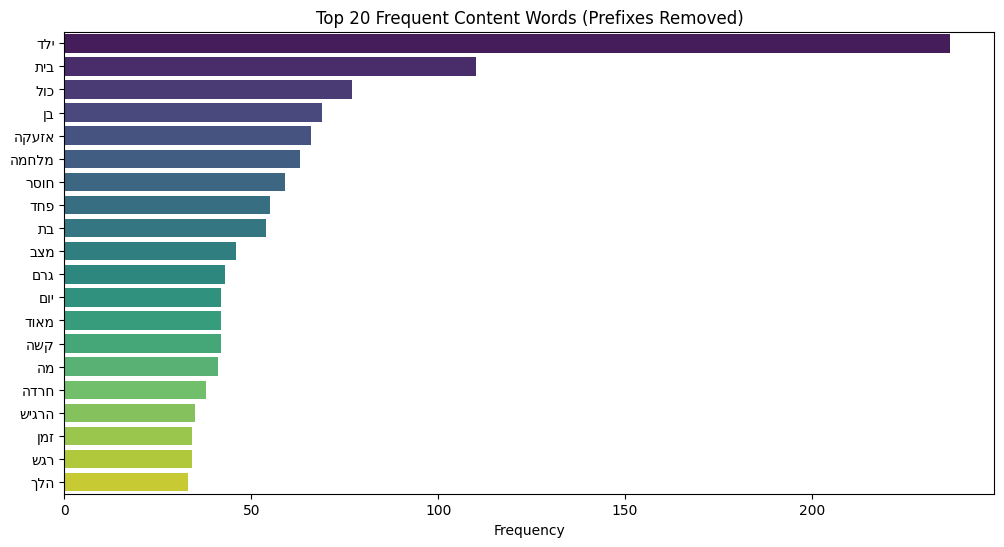

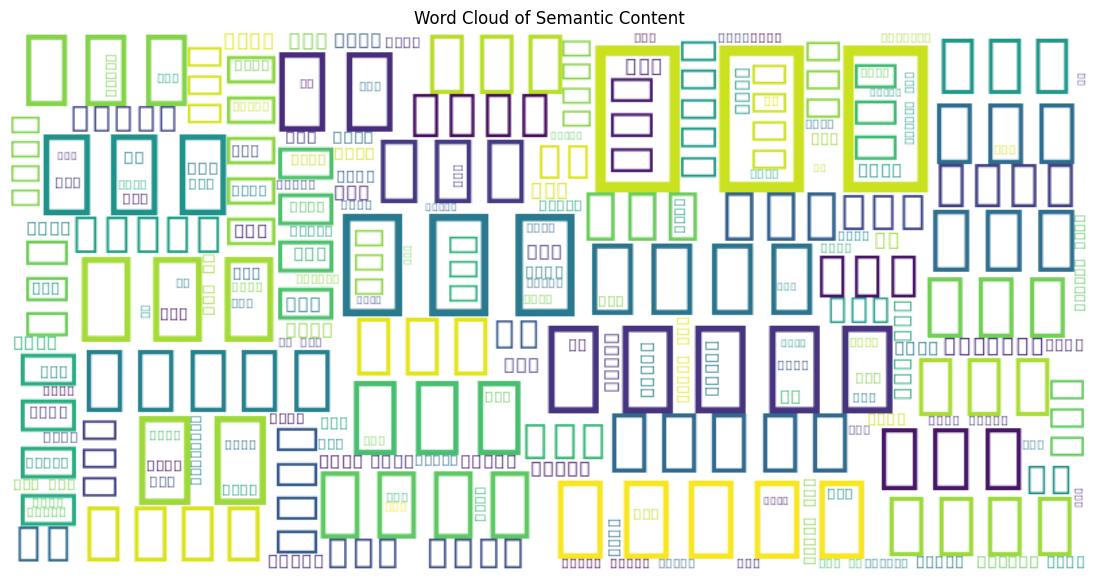

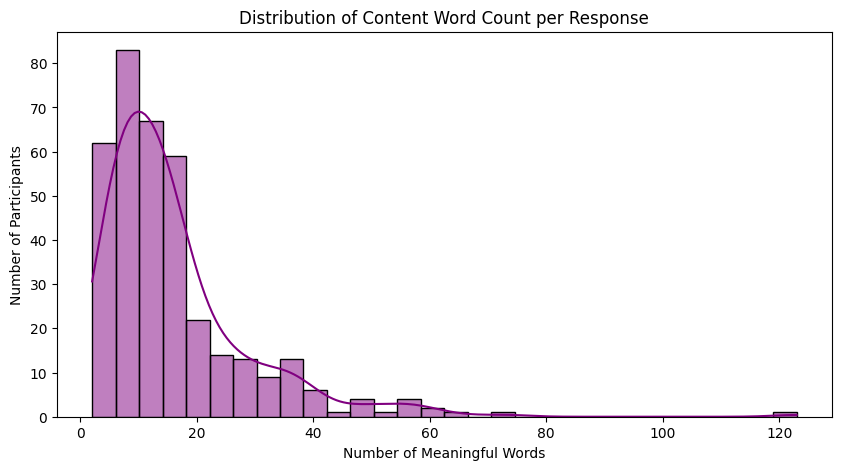

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# 1. Define Hebrew Stopwords & Prefixes to Ignore
# This list includes single-letter prefixes (handled by Stanza splitting)
# and common function words irrelevant to the semantic analysis.
ignore_words = {
    # Prefixes (often separated by Stanza)
    'ה', 'ו', 'ב', 'ל', 'ש', 'מ', 'כ', 'כש',
    # Pronouns & Function words
    'אני', 'את', 'אתה', 'אנחנו', 'הוא', 'היא', 'הם', 'הן',
    'זה', 'זאת', 'אלו', 'של', 'על', 'עם', 'כל', 'רק', 'אבל',
    'או', 'אם', 'גם', 'לא', 'כן', 'כי', 'אז', 'יותר', 'פחות',
    'היה', 'הייתה', 'היו', 'יש', 'אין', 'לי', 'לו', 'לה', 'לנו'
}

def filter_prefixes(lemma_list):
    """
    Filters out prefixes, single letters, and stopwords.
    Returns a clean list of content words.
    """
    if not isinstance(lemma_list, list):
        return []

    # Keep word if:
    # 1. It is not in the ignore list
    # 2. It is longer than 1 character (removes remaining detached prefixes)
    # 3. It is alphabetical (removes punctuation)
    return [word for word in lemma_list
            if word not in ignore_words
            and len(word) > 1
            and word.isalpha()]

# 2. Apply Filtering
# Assumes 'lemmas' is the column from the previous Stanza step
data['clean_content'] = data['lemmas'].apply(filter_prefixes)

# 3. Flatten list for global statistics
all_words = [word for sublist in data['clean_content'] for word in sublist]
word_counts = Counter(all_words)

# --- VISUALIZATION 1: Top 20 Most Frequent Content Words ---

# Get top 20 words
top_words = word_counts.most_common(20)
words = [w[0] for w in top_words]
counts = [w[1] for w in top_words]

# Reverse Hebrew strings for correct display in Matplotlib
words_reversed = [w[::-1] for w in words]

plt.figure(figsize=(12, 6))
sns.barplot(x=counts, y=words_reversed, palette='viridis')
plt.title('Top 20 Frequent Content Words (Prefixes Removed)')
plt.xlabel('Frequency')
plt.show()

# --- VISUALIZATION 2: Word Cloud ---

# Prepare text for WordCloud (Reversing strings individually for display)
# We join them with spaces
text_for_cloud = " ".join([w[::-1] for w in all_words])

# Generate
wc = WordCloud(width=800, height=400, background_color='white', font_path=None).generate(text_for_cloud)

plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Semantic Content")
plt.show()

# --- VISUALIZATION 3: Distribution of Description Length ---
# This checks how much "content" (meaningful words) participants wrote.
# Short responses might correlate with avoidance or lower engagement.

data['content_length'] = data['clean_content'].apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(data['content_length'], bins=30, kde=True, color='purple')
plt.title('Distribution of Content Word Count per Response')
plt.xlabel('Number of Meaningful Words')
plt.ylabel('Number of Participants')
plt.show()

In [ ]:
words

['ילד',
 'בית',
 'כול',
 'בן',
 'אזעקה',
 'מלחמה',
 'חוסר',
 'פחד',
 'בת',
 'מצב',
 'גרם',
 'יום',
 'מאוד',
 'קשה',
 'מה',
 'חרדה',
 'הרגיש',
 'זמן',
 'רגש',
 'הלך']

In [ ]:
target_words = list(set(target_words).union(words))


NameError: name 'target_words' is not defined

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Define specific words to investigate (Lemmatized forms)
# These align with the CBCL subscales mentioned in your papers.
target_words = [
    'פחד',    # Fear (Internalizing)
    'בכה',    # Cry (Internalizing)
    'כעס',    # Anger (Externalizing)
    'צעק',    # Shout (Externalizing)
    'מצב',  # Hit (Externalizing)
    'זמן',   # Cling (Internalizing/Anxiety)
    'לבד',    # Alone (Isolation)
    'קשה'     # Hard/Difficult (General Distress)
]
target_words = list(set(target_words).union(words))

# 2. Extract Features for these words only
# We assume 'clean_content' contains the list of lemmas from the previous step.
# If you only have the text column, use data['text_column'] and searching strings.

analysis_data = []

for index, row in data.iterrows():
    # Flatten the list of lemmas for this participant
    lemmas = row['clean_content']

    # Base dictionary with the target score
    row_stats = {
        'CBCL_score': row['CBCL_score'] # Ensure this matches your column name exactly
    }

    # Calculate stats for each target word
    for word in target_words:
        count = lemmas.count(word)
        row_stats[f'count_{word}'] = count
        row_stats[f'has_{word}'] = "Yes" if count > 0 else "No"

    analysis_data.append(row_stats)

df_analysis = pd.DataFrame(analysis_data)

# --- VISUALIZATION 1: IMPACT OF APPEARANCE (Box Plots) ---
# Question: "Is the CBCL score higher when the word appears?"

plt.figure(figsize=(15, 20))

# We create subplots for each word
for i, word in enumerate(target_words):
    plt.subplot(6, 4, i+1) # Adjust grid size (2 rows, 4 columns) based on list length

    sns.boxplot(x=f'has_{word}', y='CBCL_score', data=df_analysis,
                order=['No', 'Yes'], palette={'No': 'skyblue', 'Yes': 'salmon'})

    plt.title(f'Word: {word[::-1]}') # Reverse Hebrew for title
    plt.xlabel('')
    plt.ylabel('CBCL Score' if i % 4 == 0 else '') # Only show label on left plots

plt.suptitle('Impact of Word Appearance on CBCL Score', fontsize=16)
plt.tight_layout()
plt.show()

# --- VISUALIZATION 2: IMPACT OF INCREASING FREQUENCY (Line/Bar Plots) ---
# Question: "Does the score go up as the word is used more?"

plt.figure(figsize=(15, 6))

# Choose just one or two strong words to visualize detailed frequency trends
# Otherwise the plot gets too messy. Let's look at 'fear' (פחד) and 'anger' (כעס).
focus_words = ['פחד', 'כעס']

for word in focus_words:
    # Calculate Mean CBCL score for each frequency (0 times, 1 time, 2 times...)
    # We group 3+ occurrences together to avoid noisy outliers with small samples.

    df_analysis[f'freq_group_{word}'] = df_analysis[f'count_{word}'].apply(lambda x: str(x) if x < 3 else '3+')

    # Sort order for x-axis
    order = ['0', '1', '2', '3+']

    # Group and plot
    sns.lineplot(x=f'freq_group_{word}', y='CBCL_score', data=df_analysis,
                 marker='o', label=word[::-1], errorbar='se') # 'se' shows Standard Error confidence interval

plt.title('Mean CBCL Score vs. Word Frequency')
plt.xlabel('Number of times word appears in text')
plt.ylabel('Mean CBCL Score')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- STATISTICAL CHECK (T-Test) ---
# Quickly check if the difference between "Yes" and "No" groups is significant
from scipy.stats import ttest_ind

print("--- Statistical Significance (T-Test: Word Present vs. Absent) ---")
for word in target_words:
    group_yes = df_analysis[df_analysis[f'has_{word}'] == 'Yes']['CBCL_score']
    group_no = df_analysis[df_analysis[f'has_{word}'] == 'No']['CBCL_score']

    if len(group_yes) > 0 and len(group_no) > 0:
        t_stat, p_val = ttest_ind(group_yes, group_no, equal_var=False)
        sig = "**" if p_val < 0.05 else ""
        print(f"Word '{word[::-1]}': p-value = {p_val:.4f} {sig}")

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import ttest_ind

# 1. Identify the Top 20 Most Frequent Words
# We use the 'clean_content' column (lemmas without prefixes) from the previous step.
# Ensure you run the "filter_prefixes" step before this.
all_lemmas = [word for sublist in data['clean_content'] for word in sublist]
top_20_words = [word for word, count in Counter(all_lemmas).most_common(20)]

# 2. Calculate Statistics for Each Word
analysis_data = []
stats_list = []

print(f"{'Word':<15} | {'Mean Score (Present)':<20} | {'Mean Score (Absent)':<20} | {'P-Value':<10}")
print("-" * 80)

for word in top_20_words:
    # Create a mask: True if the word appears in the parent's text, False otherwise
    has_word = data['clean_content'].apply(lambda x: word in x)

    # Split the CBCL scores into two groups
    scores_present = data.loc[has_word, 'CBCL_score']
    scores_absent = data.loc[~has_word, 'CBCL_score']

    # Calculate Means
    mean_present = scores_present.mean()
    mean_absent = scores_absent.mean()

    # Perform T-Test (only if we have enough data points, e.g., >5 in each group)
    if len(scores_present) > 5 and len(scores_absent) > 5:
        t_stat, p_val = ttest_ind(scores_present, scores_absent, equal_var=False)
    else:
        p_val = 1.0 # Not significant if data is insufficient

    # Store data for plotting
    diff = mean_present - mean_absent  # Positive diff = Word linked to HIGHER score
    stats_list.append({
        'word': word,
        'mean_present': mean_present,
        'mean_absent': mean_absent,
        'diff': diff,
        'p_val': p_val
    })

    # Print simplified table
    sig_mark = "**" if p_val < 0.05 else ""
    print(f"{word[::-1]:<15} | {mean_present:<20.2f} | {mean_absent:<20.2f} | {p_val:.4f} {sig_mark}")

# 3. Visualization: Difference in Means
stats_df = pd.DataFrame(stats_list)
stats_df = stats_df.sort_values('diff', ascending=False) # Sort: Risk words on top

plt.figure(figsize=(12, 8))

# Color coding: Red for significant Risk, Green for significant Protective, Gray for insignificant
colors = []
for _, row in stats_df.iterrows():
    if row['p_val'] < 0.05:
        # Significant
        colors.append('salmon' if row['diff'] > 0 else 'lightgreen')
    else:
        # Not Significant
        colors.append('lightgray')

# Reverse Hebrew labels for correct display
labels_reversed = [w[::-1] for w in stats_df['word']]

# Create Bar Plot
sns.barplot(x='diff', y=labels_reversed, data=stats_df, palette=colors)

plt.axvline(0, color='black', linestyle='--')
plt.title('Impact of Top 20 Common Words on CBCL Score\n(Difference in Mean Score: Present vs. Absent)', fontsize=14)
plt.xlabel('Difference in CBCL Score Points (Positive = Risk, Negative = Protective)')
plt.ylabel('Word')

# Manual Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='salmon', label='Significantly Higher Score (Risk Factor)'),
    Patch(facecolor='lightgreen', label='Significantly Lower Score (Resilience Factor)'),
    Patch(facecolor='lightgray', label='Not Significant')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# --- CONFIGURATION ---
TARGET_COL = 'CBCL_score'  # <--- REPLACE with your actual score column name
MIN_DOC_FREQ = 5           # Ignore words appearing in fewer than 5 responses

# 1. Prepare Data for Vectorization
# CountVectorizer expects a list of strings (sentences), not a list of lists.
# We join your filtered lemmas back into strings.
corpus = data['clean_content'].apply(lambda x: ' '.join(x))

# 2. Vectorize (Create the "Bag of Words")
# We only keep words that appear in at least MIN_DOC_FREQ documents to filter noise.
vectorizer = CountVectorizer(min_df=MIN_DOC_FREQ)
X = vectorizer.fit_transform(corpus)

# Create a DataFrame of word counts
word_counts_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# 3. Calculate Correlations
# We assume the index of word_counts_df matches 'data'. Reset index to be safe.
word_counts_df.index = data.index

# Add the target score to the word dataframe temporarily to calculate corr
word_counts_df['__TARGET__'] = data[TARGET_COL]

# Calculate correlation of every word with the target
correlations = word_counts_df.corr()['__TARGET__'].drop('__TARGET__')

# 4. Extract Top Positive and Negative Correlations
top_positive = correlations.sort_values(ascending=False).head(20)
top_negative = correlations.sort_values(ascending=True).head(20)

print("--- Top Words Associated with HIGH CBCL Scores (Risk?) ---")
print(top_positive)
print("\n--- Top Words Associated with LOW CBCL Scores (Resilience?) ---")
print(top_negative)

# --- VISUALIZATION: Correlation Bar Plot ---

# Combine top pos/neg for a single plot
top_corr = pd.concat([top_positive, top_negative])

plt.figure(figsize=(10, 8))

# Reverse Hebrew labels for display
labels_reversed = [w[::-1] for w in top_corr.index]

sns.barplot(x=top_corr.values, y=labels_reversed, palette='coolwarm')
plt.title(f'Correlation between Word Usage and {TARGET_COL}', fontsize=14)
plt.xlabel('Pearson Correlation Coefficient')
plt.axvline(0, color='black', linestyle='--')
plt.show()

# --- VISUALIZATION: Specific Word Impact (Box Plot) ---
# Let's verify if a specific "high risk" word actually separates the groups.
# We take the #1 most positively correlated word.

if not top_positive.empty:
    risk_word = top_positive.index[0] # The word with highest correlation

    # Create a binary column: Did the parent use this word? Yes/No
    data['has_risk_word'] = data['clean_content'].apply(lambda x: risk_word in x)

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x='has_risk_word', y=TARGET_COL, palette='Set2')
    plt.title(f'Effect of using the word "{risk_word[::-1]}" on {TARGET_COL}')
    plt.xlabel(f'Contains word "{risk_word[::-1]}"?')
    plt.ylabel('CBCL Score')
    plt.show()

In [ ]:
risk_words = top_corr.keys()

In [ ]:

# List of top 10 words
# top_words = ["ילדים","שלי","בית","אזעקה","חוסר","ילד","חמה","הבן","הבת","לי","שאני","מצב","שלא"]

# Create binary columns: 1 if word appears in Event_words_lst, 0 otherwise
for word in risk_words:
    data[f'word_{word}'] = data['lemmas'].apply(lambda lst: int(word in lst))

# Compare mean CBCL for events with vs without each word
comparison = []
for word in risk_words:
    col = f'word_{word}'
    mean_with = data.loc[data[col] == 1, 'CBCL_score'].mean()
    mean_without = data.loc[data[col] == 0, 'CBCL_score'].mean()
    comparison.append({
        'word': word,
        'CBCL_with_word': mean_with,
        'CBCL_without_word': mean_without
    })

comparison_df = pd.DataFrame(comparison)

# Melt for plotting
comparison_melted = comparison_df.melt(
    id_vars='word',
    value_vars=['CBCL_with_word', 'CBCL_without_word'],
    var_name='Condition', value_name='CBCL_score'
)

# Clean names for plot
comparison_melted['Condition'] = comparison_melted['Condition'].map({
    'CBCL_with_word': 'With Word',
    'CBCL_without_word': 'Without Word'
})

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=comparison_melted, x='CBCL_score', y='word', hue='Condition')
plt.xlabel('Mean CBCL Score')
plt.ylabel('Word')
plt.title('CBCL Scores by Presence of Top 10 Event Words')
plt.legend(title='')
plt.tight_layout()
plt.show()


In [26]:
# 1. Install Sentence Transformers (Run this once)
!pip install sentence_transformers

In [27]:
data = data[data['EER_text'].notna()]

In [ ]:
data.shape


(270, 356)

In [28]:
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score
import re


# --- STEP A: Encode Text to Vectors ---
# We use a multilingual model that supports Hebrew well.
# This replaces the need to manually average Word2Vec vectors.
print("Loading Embedding Model...")
model_name = 'intfloat/multilingual-e5-base'
embedding_model = SentenceTransformer(model_name)


# Ensure we are using the original Hebrew text column (not the lemmas)
# for context-aware embeddings.
# REPLACE 'text_column' with your actual column name.
text_col = ['Event', 'EER_text']
target_col = 'CBCL_score'

# Encode the text
print("Encoding text features... (This may take a moment)")
# The model converts each text entry into a vector of numbers (e.g., 384 dimensions)
# X_Event_embeddings = embedding_model.encode(data[text_col[0]].tolist(), show_progress_bar=True)
# X_EER_embeddings = embedding_model.encode(data[text_col[1]].tolist(), show_progress_bar=True)
# X_embeddings = data.iloc[:, -40:].values
# X_embeddings = np.hstack([X_Event_embeddings, X_EER_embeddings])
# X_embeddings = embedding_model.encode(data['Event'].tolist(), show_progress_bar=True)
# def embed_hebrew(texts):
#     all_vecs = []
#     for t in texts:
#         parts = re.split(r"[.!?…]", t)
#         parts = [p.strip() for p in parts if len(p.strip()) > 5]

#         # E5 requires this prefix
#         parts = ["query: " + p for p in parts]

#         vecs = embedding_model.encode(
#             parts,
#             normalize_embeddings=True
#         )
#         all_vecs.append(vecs.mean(axis=0))
#     return np.vstack(all_vecs)


# X_embeddings = embed_hebrew(data["Event"].tolist())


# # Scale features, as Ridge is sensitive to feature scale
# from sklearn.preprocessing import normalize
# X_embeddings = normalize(X_embeddings)


X_Event_embeddings = embedding_model.encode(
    ["passage: " + t for t in data["Event"].fillna("").astype(str).tolist()],
    normalize_embeddings=True,
    show_progress_bar=True
)
X_EER_embeddings = embedding_model.encode(
    ["passage: " + t for t in data["EER_text"].fillna("").astype(str).tolist()],
    normalize_embeddings=True,
    show_progress_bar=True
)
X_embeddings = np.hstack([X_Event_embeddings, X_EER_embeddings])


# Prepare Target
y = data[target_col].values

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train_num, y_test_num = train_test_split(X_embeddings, y, test_size=0.2, random_state=42)


# define High as top 15% (change 0.85 -> 0.90 for top 10%, 0.80 for top 20%)
t1 = np.quantile(y_train_num, 0.50)
t2 = np.quantile(y_train_num, 0.85)

def cbcl_to_group(y):
    # returns array of strings: "Low", "Medium", "High"
    y = np.asarray(y)
    return np.where(y <= t1, "Low",
                    np.where(y <= t2, "Medium", "High"))

y_train = cbcl_to_group(y_train_num)
y_test  = cbcl_to_group(y_test_num)

print("\nTrain thresholds (computed on TRAIN only):")
print("t1 (median) =", t1)
print("t2 (85th percentile) =", t2)

print("\nTrain group counts:\n", pd.Series(y_train).value_counts())
print("\nTest group counts:\n", pd.Series(y_test).value_counts())



Loading Embedding Model...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

Encoding text features... (This may take a moment)


Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/9 [00:00<?, ?it/s]


Train thresholds (computed on TRAIN only):
t1 (median) = 13.0
t2 (85th percentile) = 30.0

Train group counts:
 Low       112
Medium     73
High       31
Name: count, dtype: int64

Test group counts:
 Low       24
Medium    21
High       9
Name: count, dtype: int64


In [ ]:
X_train.shape

(216, 1536)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_recall_fscore_support,
    fbeta_score
)


# -------------------------------------------------------
# Helper: compute High precision/recall/F2 + confusion matrix
# -------------------------------------------------------
def eval_model(name, y_true, y_pred):
    # precision/recall/f1 for each class
    labels = ["Low", "Medium", "High"]
    p, r, f1, sup = precision_recall_fscore_support(
        y_true, y_pred, labels=labels, zero_division=0
    )
    # High-only metrics
    idx_high = labels.index("High")
    high_precision = p[idx_high]
    high_recall    = r[idx_high]
    high_f2        = fbeta_score(y_true, y_pred, labels=[POS_LABEL],
                                 beta=2, average="binary",
                                 pos_label=POS_LABEL, zero_division=0)

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    out = {
        "Model": name,
        "High Precision": high_precision,
        "High Recall": high_recall,
        "High F2": high_f2,
        "ConfusionMatrix": cm
    }
    return out

results = []

# -------------------------------
# BASELINE 0: Majority class
# -------------------------------
# Predicts the most frequent class in TRAIN
baseline_majority = DummyClassifier(strategy="most_frequent")
baseline_majority.fit(X_train.reshape(-1, 1), y_train)  # X unused but required
y_pred_majority = baseline_majority.predict(X_test.reshape(-1, 1))
results.append(eval_model("Baseline 0: Majority", y_test, y_pred_majority))

# -----------------------------------------
# BASELINE 1: Random proportional baseline
# -----------------------------------------
# Predicts randomly according to TRAIN class frequencies
# We'll run it multiple times and average metrics for stability.
train_counts = pd.Series(y_train).value_counts(normalize=True)
classes = train_counts.index.tolist()
probs = train_counts.values

n_runs = 50
hp, hr, hf2 = [], [], []
for _ in range(n_runs):
    y_pred_rand = np.random.choice(classes, size=len(y_test), p=probs)
    m = eval_model("Baseline 1: Random (proportional)", y_test, y_pred_rand)
    hp.append(m["High Precision"])
    hr.append(m["High Recall"])
    hf2.append(m["High F2"])

results.append({
    "Model": "Baseline 1: Random (proportional)",
    "High Precision": float(np.mean(hp)),
    "High Recall": float(np.mean(hr)),
    "High F2": float(np.mean(hf2)),
    "ConfusionMatrix": None
})

# --------------------------------------------------------
# LINEAR MODEL: TF-IDF (char ngrams) + Logistic Regression
# --------------------------------------------------------
pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        analyzer="char_wb",
        ngram_range=(3, 5),
        min_df=2
    )),
    ("clf", LogisticRegression(
        multi_class="multinomial",
        solver="lbfgs",
        max_iter=2000,
        class_weight="balanced"   # important for rare High
    ))
])

param_grid = {
    # regularization strength: smaller C => stronger regularization
    "clf__C": [0.1, 0.3, 1, 3, 10],
    # optional: tune ngram size a bit
    "tfidf__ngram_range": [(3,5), (3,6)],
    "tfidf__min_df": [2, 3]
}

# We want a scorer aligned with your goal:
# We'll tune by High recall using a custom scorer via 'make_scorer'
from sklearn.metrics import make_scorer, recall_score

def high_recall_scorer(y_true, y_pred):
    return recall_score(y_true, y_pred, pos_label=POS_LABEL, average="binary")

scorer = make_scorer(high_recall_scorer)

cv = Stratif

ValueError: Found input variables with inconsistent numbers of samples: [331776, 216]

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_recall_fscore_support,
    fbeta_score,
    make_scorer,
    recall_score
)


# ----------------------------
# Helper: High metrics + CM
# ----------------------------
def eval_model(name, y_true, y_pred):
    p, r, f1, sup = precision_recall_fscore_support(
        y_true, y_pred, labels=labels, zero_division=0
    )
    idx_high = labels.index("High")
    high_precision = p[idx_high]
    high_recall = r[idx_high]
    # Calculate fbeta_score for all classes and then select the 'High' class
    f2_scores = fbeta_score(
        y_true, y_pred,
        labels=labels,
        beta=2, average=None,
        zero_division=0
    )
    high_f2 = f2_scores[idx_high]

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    return {
        "Model": name,
        "High Precision": high_precision,
        "High Recall": high_recall,
        "High F2": high_f2,
        "ConfusionMatrix": cm
    }

results = []

# =========================================
# Baseline 0: Majority class
# =========================================
baseline_majority = DummyClassifier(strategy="most_frequent")
baseline_majority.fit(X_train, y_train)
y_pred_majority = baseline_majority.predict(X_test)
results.append(eval_model("Baseline 0: Majority", y_test, y_pred_majority))

# =========================================
# Baseline 1: Random proportional baseline
# =========================================
train_counts = pd.Series(y_train).value_counts(normalize=True)
classes = train_counts.index.tolist()
probs = train_counts.values

n_runs = 50
hp, hr, hf2 = [], [], []
for _ in range(n_runs):
    y_pred_rand = np.random.choice(classes, size=len(y_test), p=probs)
    m = eval_model("Baseline 1: Random", y_test, y_pred_rand)
    hp.append(m["High Precision"])
    hr.append(m["High Recall"])
    hf2.append(m["High F2"])

results.append({
    "Model": "Baseline 1: Random (proportional)",
    "High Precision": float(np.mean(hp)),
    "High Recall": float(np.mean(hr)),
    "High F2": float(np.mean(hf2)),
    "ConfusionMatrix": None
})

# =========================================
# Linear model: Logistic Regression on embeddings
# =========================================
# Define the multiclass classifier FIRST
clf = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=3000,
    class_weight="balanced"
)


def high_recall_scorer(y_true, y_pred):
    y_true_high = (np.asarray(y_true) == "High").astype(int)
    y_pred_high = (np.asarray(y_pred) == "High").astype(int)
    return recall_score(y_true_high, y_pred_high, average="binary", zero_division=0)

scorer = make_scorer(high_recall_scorer)

param_grid = {
    "C": [0.1, 0.3, 1, 3, 10]  # regularization strength
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    clf,
    param_grid=param_grid,
    scoring=scorer,     # optimize for catching High
    cv=cv,
    n_jobs=-1,
    verbose=1
)

print("\n--- Tuning Logistic Regression (Grid Search, optimizing High recall) ---")
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best params:", grid.best_params_)


--- Tuning Logistic Regression (Grid Search, optimizing High recall) ---
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best params: {'C': 0.1}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
y_pred_model = best_model.predict(X_test)
results.append(eval_model("Linear Model", y_test, y_pred_model))

In [ ]:
results
# pd.DataFrame(results).set_index("Model").iloc[2,3]

[{'Model': 'Baseline 0: Majority',
  'High Precision': np.float64(0.0),
  'High Recall': np.float64(0.0),
  'High F2': np.float64(0.0),
  'ConfusionMatrix': array([[23,  0,  0],
         [23,  0,  0],
         [ 8,  0,  0]])},
 {'Model': 'Baseline 1: Random (proportional)',
  'High Precision': 0.12504928404928403,
  'High Recall': 0.1325,
  'High F2': 0.1296868190302969,
  'ConfusionMatrix': None},
 {'Model': 'Linear Model',
  'High Precision': np.float64(0.1),
  'High Recall': np.float64(0.125),
  'High F2': np.float64(0.11904761904761904),
  'ConfusionMatrix': array([[13,  6,  4],
         [ 7, 11,  5],
         [ 5,  2,  1]])}]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, precision_recall_fscore_support,
    fbeta_score, make_scorer, recall_score
)

labels = ["Low", "Medium", "High"]
POS_LABEL = "High"

def eval_model(name, y_true, y_pred):
    p, r, f1, sup = precision_recall_fscore_support(
        y_true, y_pred, labels=labels, zero_division=0
    )
    idx_high = labels.index("High")
    high_precision = p[idx_high]
    high_recall = r[idx_high]

    f2_scores = fbeta_score(
        y_true, y_pred,
        labels=labels,
        beta=2, average=None,
        zero_division=0
    )
    high_f2 = f2_scores[idx_high]
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    return {
        "Model": name,
        "High Precision": float(high_precision),
        "High Recall": float(high_recall),
        "High F2": float(high_f2),
        "ConfusionMatrix": cm
    }

results = []

# --- Baseline 0: Majority
baseline_majority = DummyClassifier(strategy="most_frequent")
baseline_majority.fit(X_train, y_train)
y_pred_majority = baseline_majority.predict(X_test)
results.append(eval_model("Baseline 0: Majority", y_test, y_pred_majority))

# --- Baseline 1: Random proportional
train_counts = pd.Series(y_train).value_counts(normalize=True)
classes = train_counts.index.tolist()
probs = train_counts.values

n_runs = 50
hp, hr, hf2 = [], [], []
for _ in range(n_runs):
    y_pred_rand = np.random.choice(classes, size=len(y_test), p=probs)
    m = eval_model("Baseline 1: Random", y_test, y_pred_rand)
    hp.append(m["High Precision"])
    hr.append(m["High Recall"])
    hf2.append(m["High F2"])

cm_sum = np.zeros((3,3), dtype=float)

for _ in range(n_runs):
    y_pred_rand = np.random.choice(classes, size=len(y_test), p=probs)
    cm_sum += confusion_matrix(y_test, y_pred_rand, labels=labels)

cm_avg = cm_sum / n_runs
# print("Average confusion matrix over runs:\n", cm_avg)


results.append({
    "Model": "Baseline 1: Random (proportional)",
    "High Precision": float(np.mean(hp)),
    "High Recall": float(np.mean(hr)),
    "High F2": float(np.mean(hf2)),
    "ConfusionMatrix": cm_avg
})

# --- Linear Model: multinomial LogReg on embeddings
clf = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=3000,
    class_weight="balanced"
)

def high_recall_only(y_true, y_pred):
    y_true_high = (np.asarray(y_true) == POS_LABEL).astype(int)
    y_pred_high = (np.asarray(y_pred) == POS_LABEL).astype(int)
    return recall_score(y_true_high, y_pred_high, average="binary", zero_division=0)

scorer = make_scorer(high_recall_only)

param_grid = {"C": [0.1, 0.3, 1, 3, 10]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring=scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

print("Best params:", grid.best_params_)
print("Best CV High Recall:", grid.best_score_)

y_pred_model = best_model.predict(X_test)
results.append(eval_model("Linear: Embeddings + LogReg", y_test, y_pred_model))

# --- Print slide-ready table
res_df = pd.DataFrame([{k:v for k,v in r.items() if k!="ConfusionMatrix"} for r in results])
print("\nSlide-ready metrics:")
print(res_df.to_string(index=False))

print("\nConfusion matrix (Linear model):")
print(results[-1]["ConfusionMatrix"])

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best params: {'C': 3}
Best CV High Recall: 0.22857142857142856

Slide-ready metrics:
                            Model  High Precision  High Recall  High F2
             Baseline 0: Majority        0.000000     0.000000 0.000000
Baseline 1: Random (proportional)        0.171934     0.140000 0.143491
      Linear: Embeddings + LogReg        0.153846     0.222222 0.204082

Confusion matrix (Linear model):
[[12  7  5]
 [ 7  8  6]
 [ 6  1  2]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, precision_recall_fscore_support,
    fbeta_score, make_scorer, recall_score
)

labels = ["Low", "Medium", "High"]
POS_LABEL = "High"   # still tuning for High recall (your main objective)

def eval_model(name, y_true, y_pred):
    # Per-class precision/recall/F1
    p, r, f1, sup = precision_recall_fscore_support(
        y_true, y_pred, labels=labels, zero_division=0
    )

    # Per-class F2 (one-vs-rest for each class)
    f2_scores = fbeta_score(
        y_true, y_pred,
        labels=labels,
        beta=2, average=None,
        zero_division=0
    )

    idx_low = labels.index("Low")
    idx_med = labels.index("Medium")
    idx_high = labels.index("High")

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    return {
        "Model": name,

        # Medium metrics
        "Medium Precision": float(p[idx_med]),
        "Medium Recall": float(r[idx_med]),
        "Medium F2": float(f2_scores[idx_med]),

        # High metrics
        "High Precision": float(p[idx_high]),
        "High Recall": float(r[idx_high]),
        "High F2": float(f2_scores[idx_high]),

        "ConfusionMatrix": cm
    }

results = []

# --- Baseline 0: Majority
baseline_majority = DummyClassifier(strategy="most_frequent")
baseline_majority.fit(X_train, y_train)
y_pred_majority = baseline_majority.predict(X_test)
results.append(eval_model("Baseline 0: Majority", y_test, y_pred_majority))

# --- Baseline 1: Random proportional (average metrics + average confusion matrix)
train_counts = pd.Series(y_train).value_counts(normalize=True)
classes = train_counts.index.tolist()
probs = train_counts.values

n_runs = 50

# store metrics across runs
med_p, med_r, med_f2 = [], [], []
high_p, high_r, high_f2 = [], [], []

cm_sum = np.zeros((3,3), dtype=float)

for _ in range(n_runs):
    y_pred_rand = np.random.choice(classes, size=len(y_test), p=probs)
    m = eval_model("Baseline 1: Random", y_test, y_pred_rand)

    med_p.append(m["Medium Precision"])
    med_r.append(m["Medium Recall"])
    med_f2.append(m["Medium F2"])

    high_p.append(m["High Precision"])
    high_r.append(m["High Recall"])
    high_f2.append(m["High F2"])

    cm_sum += confusion_matrix(y_test, y_pred_rand, labels=labels)

cm_avg = cm_sum / n_runs

results.append({
    "Model": "Baseline 1: Random (proportional)",

    "Medium Precision": float(np.mean(med_p)),
    "Medium Recall": float(np.mean(med_r)),
    "Medium F2": float(np.mean(med_f2)),

    "High Precision": float(np.mean(high_p)),
    "High Recall": float(np.mean(high_r)),
    "High F2": float(np.mean(high_f2)),

    "ConfusionMatrix": cm_avg
})

# --- Linear Model: multinomial LogReg on embeddings (tune for High recall)
clf = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=3000,
    class_weight="balanced"
)


def high_recall_only(y_true, y_pred):
    y_true_high = (np.asarray(y_true) == POS_LABEL).astype(int)
    y_pred_high = (np.asarray(y_pred) == POS_LABEL).astype(int)
    return recall_score(y_true_high, y_pred_high, average="binary", zero_division=0)

scorer = make_scorer(high_recall_only)

param_grid = {"C": [0.1, 0.3, 1, 3, 10]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring=scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

print("Best params:", grid.best_params_)
print("Best CV High Recall:", grid.best_score_)

y_pred_model = best_model.predict(X_test)
results.append(eval_model("Linear: Embeddings + LogReg", y_test, y_pred_model))

# --- Print slide-ready table
res_df = pd.DataFrame([{k:v for k,v in r.items() if k!="ConfusionMatrix"} for r in results])
print("\nSlide-ready metrics:")
print(res_df.to_string(index=False))

print("\nConfusion matrix (Linear model):")
print(results[-1]["ConfusionMatrix"])

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best params: {'C': 3}
Best CV High Recall: 0.22857142857142856

Slide-ready metrics:
                            Model  Medium Precision  Medium Recall  Medium F2  High Precision  High Recall  High F2
             Baseline 0: Majority          0.000000       0.000000   0.000000        0.000000     0.000000 0.000000
Baseline 1: Random (proportional)          0.369679       0.296190   0.306792        0.148780     0.151111 0.148914
      Linear: Embeddings + LogReg          0.500000       0.380952   0.400000        0.153846     0.222222 0.204082

Confusion matrix (Linear model):
[[12  7  5]
 [ 7  8  6]
 [ 6  1  2]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [33]:
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_fscore_support,
    fbeta_score,
    f1_score,
    make_scorer,
    recall_score
)

labels = ["Low", "Medium", "High"]
POS_LABEL = "High"

def eval_model(name, y_true, y_pred):
    # Per-class precision/recall/F1
    p, r, f1, sup = precision_recall_fscore_support(
        y_true, y_pred, labels=labels, zero_division=0
    )

    # Per-class F2 (one-vs-rest for each class)
    f2_scores = fbeta_score(
        y_true, y_pred,
        labels=labels,
        beta=2, average=None,
        zero_division=0
    )

    idx_low = labels.index("Low")
    idx_med = labels.index("Medium")
    idx_high = labels.index("High")

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    # Extra (helpful for slides): per-class F1 + Macro-F1
    f1_each = f1_score(y_true, y_pred, labels=labels, average=None, zero_division=0)
    macro_f1 = f1_score(y_true, y_pred, average="macro", zero_division=0)

    return {
        "Model": name,

        # Medium metrics
        "Medium Precision": float(p[idx_med]),
        "Medium Recall": float(r[idx_med]),
        "Medium F1": float(f1_each[idx_med]),
        "Medium F2": float(f2_scores[idx_med]),

        # High metrics
        "High Precision": float(p[idx_high]),
        "High Recall": float(r[idx_high]),
        "High F1": float(f1_each[idx_high]),
        "High F2": float(f2_scores[idx_high]),

        # Overall metric
        "Macro-F1": float(macro_f1),

        "ConfusionMatrix": cm
    }

results = []

# =========================
# Baseline 0: Majority class
# =========================
baseline_majority = DummyClassifier(strategy="most_frequent")
baseline_majority.fit(X_train, y_train)
y_pred_majority = baseline_majority.predict(X_test)
results.append(eval_model("Majority Baseline", y_test, y_pred_majority))

# ==================================
# Baseline 1: Random proportional
# (average metrics + avg confusion)
# ==================================
train_counts = pd.Series(y_train).value_counts(normalize=True)
classes = train_counts.index.tolist()
probs = train_counts.values

n_runs = 50

# Collect metrics across runs
med_p, med_r, med_f1, med_f2 = [], [], [], []
high_p, high_r, high_f1, high_f2 = [], [], [], []
macro_f1s = []

cm_sum = np.zeros((3, 3), dtype=float)

for _ in range(n_runs):
    y_pred_rand = np.random.choice(classes, size=len(y_test), p=probs)
    m = eval_model("Random Baseline", y_test, y_pred_rand)

    med_p.append(m["Medium Precision"])
    med_r.append(m["Medium Recall"])
    med_f1.append(m["Medium F1"])
    med_f2.append(m["Medium F2"])

    high_p.append(m["High Precision"])
    high_r.append(m["High Recall"])
    high_f1.append(m["High F1"])
    high_f2.append(m["High F2"])

    macro_f1s.append(m["Macro-F1"])

    cm_sum += confusion_matrix(y_test, y_pred_rand, labels=labels)

cm_avg = cm_sum / n_runs

results.append({
    "Model": "Random Baseline",

    "Medium Precision": float(np.mean(med_p)),
    "Medium Recall": float(np.mean(med_r)),
    "Medium F1": float(np.mean(med_f1)),
    "Medium F2": float(np.mean(med_f2)),

    "High Precision": float(np.mean(high_p)),
    "High Recall": float(np.mean(high_r)),
    "High F1": float(np.mean(high_f1)),
    "High F2": float(np.mean(high_f2)),

    "Macro-F1": float(np.mean(macro_f1s)),

    "ConfusionMatrix": cm_avg
})

# =========================================
# Linear model: Multinomial LogReg on embeddings
# tuned to maximize High recall
# =========================================
clf = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=3000,
    class_weight="balanced"
)

def high_f2_only(y_true, y_pred):
    y_true_high = (np.asarray(y_true) == POS_LABEL).astype(int)
    y_pred_high = (np.asarray(y_pred) == POS_LABEL).astype(int)
    return fbeta_score(y_true_high, y_pred_high, beta=2, average="binary", zero_division=0)

scorer = make_scorer(high_f2_only)

param_grid = {"C": [1+(i/10) for i in range(1,21)]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring=scorer,   # optimize for catching High
    cv=cv,
    n_jobs=-1,
    verbose=1
)

print("\n--- Tuning Logistic Regression (Grid Search, optimizing High recall) ---")
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best params:", grid.best_params_)
print("Best CV High Recall:", grid.best_score_)

y_pred_model = best_model.predict(X_test)
results.append(eval_model("Linear Model", y_test, y_pred_model))

# =========================
# Print slide-ready table
# =========================
res_df = pd.DataFrame([{k: v for k, v in r.items() if k != "ConfusionMatrix"} for r in results])

print("\nSlide-ready metrics:")
print(res_df.to_string(index=False, float_format=lambda x: f"{x:.3f}"))

print("\nConfusion matrix (Linear model):")
print(results[-1]["ConfusionMatrix"])


--- Tuning Logistic Regression (Grid Search, optimizing High recall) ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params: {'C': 2.4}
Best CV High Recall: 0.23177803379416279

Slide-ready metrics:
            Model  Medium Precision  Medium Recall  Medium F1  Medium F2  High Precision  High Recall  High F1  High F2  Macro-F1
Majority Baseline             0.000          0.000      0.000      0.000           0.000        0.000    0.000    0.000     0.205
  Random Baseline             0.401          0.349      0.370      0.356           0.137        0.127    0.128    0.126     0.326
     Linear Model             0.500          0.381      0.432      0.400           0.154        0.222    0.182    0.204     0.368

Confusion matrix (Linear model):
[[12  7  5]
 [ 7  8  6]
 [ 6  1  2]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [34]:
res_df[['Model','High Precision','High Recall','High F2','Macro-F1']]

,Model,High Precision,High Recall,High F2,Macro-F1
0,Majority Baseline,0.000000,0.000000,0.000000,0.205128
1,Random Baseline,0.137414,0.126667,0.126405,0.326119
2,Linear Model,0.153846,0.222222,0.204082,0.368016


In [40]:
pd.DataFrame(results[2]['ConfusionMatrix'])

,0,1,2
0,12,7,5
1,7,8,6
2,6,1,2


In [42]:
cm_df = pd.DataFrame(results[-1]['ConfusionMatrix'], index=labels, columns=labels)
print("Confusion Matrix (Linear Model):")
display(cm_df)

Confusion Matrix (Linear Model):


,Low,Medium,High
Low,12,7,5
Medium,7,8,6
High,6,1,2


In [43]:
for result in results:
    model_name = result['Model']
    cm = result['ConfusionMatrix']

    # Only display if confusion matrix is not None (e.g., for Random Baseline average)
    if cm is not None:
        cm_df = pd.DataFrame(cm, index=labels, columns=labels)
        print(f"\nConfusion Matrix ({model_name}):")
        display(cm_df)



Confusion Matrix (Majority Baseline):


,Low,Medium,High
Low,24,0,0
Medium,21,0,0
High,9,0,0



Confusion Matrix (Random Baseline):


,Low,Medium,High
Low,12.50,7.70,3.80
Medium,10.90,7.32,2.78
High,4.62,3.24,1.14



Confusion Matrix (Linear Model):


,Low,Medium,High
Low,12,7,5
Medium,7,8,6
High,6,1,2


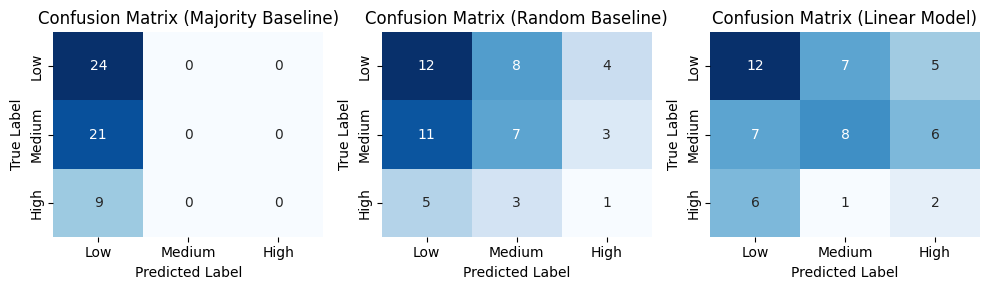

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(10, 3)) # 1 row, 3 columns
axes = axes.flatten() # Flatten the array of axes for easy iteration

for i, result in enumerate(results):
    model_name = result['Model']
    cm = result['ConfusionMatrix']

    if cm is not None:
        cm_df = pd.DataFrame(cm, index=labels, columns=labels)
        sns.heatmap(cm_df, annot=True, fmt=".0f", cmap="Blues", cbar=False, ax=axes[i])
        axes[i].set_title(f'Confusion Matrix ({model_name})')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()

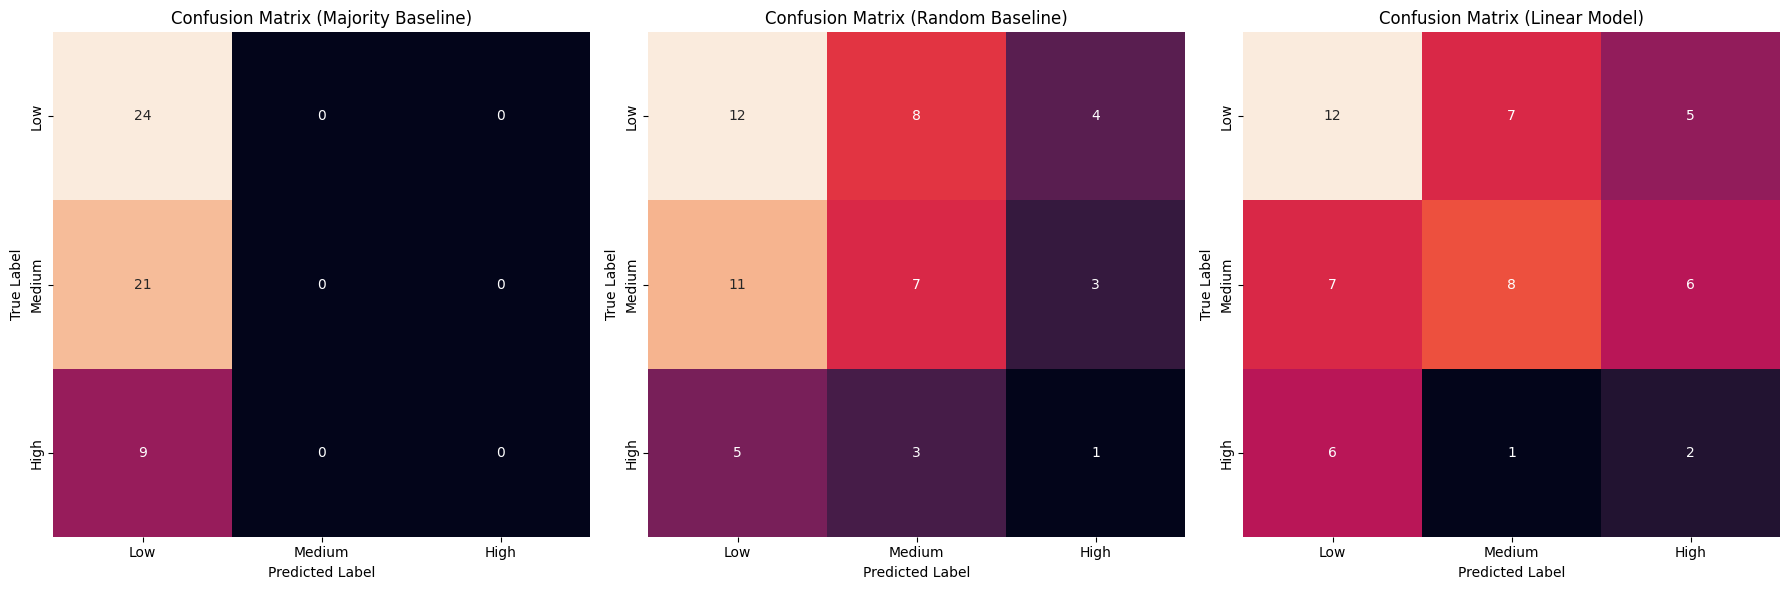

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # 1 row, 3 columns
axes = axes.flatten() # Flatten the array of axes for easy iteration

for i, result in enumerate(results):
    model_name = result['Model']
    cm = result['ConfusionMatrix']

    if cm is not None:
        cm_df = pd.DataFrame(cm, index=labels, columns=labels)
        sns.heatmap(cm_df, annot=True, fmt=".0f", cmap=None, cbar=False, ax=axes[i]) # Changed cmap to 'Greys' and set cbar=False
        axes[i].set_title(f'Confusion Matrix ({model_name})')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()

In [50]:
import pandas as pd

labels = ["Low", "Medium", "High"]

for result in results:
    model_name = result['Model']
    cm = result['ConfusionMatrix']

    # Only display if confusion matrix is not None (e.g., for Random Baseline average)
    if cm is not None:
        cm_df = pd.DataFrame(cm, index=labels, columns=labels)
        print(f"\nConfusion Matrix ({model_name}):")
        display(cm_df)



Confusion Matrix (Majority Baseline):


,Low,Medium,High
Low,24,0,0
Medium,21,0,0
High,9,0,0



Confusion Matrix (Random Baseline):


,Low,Medium,High
Low,12.50,7.70,3.80
Medium,10.90,7.32,2.78
High,4.62,3.24,1.14



Confusion Matrix (Linear Model):


,Low,Medium,High
Low,12,7,5
Medium,7,8,6
High,6,1,2


In [ ]:

y_labels = cbcl_to_group(data['CBCL_score'])

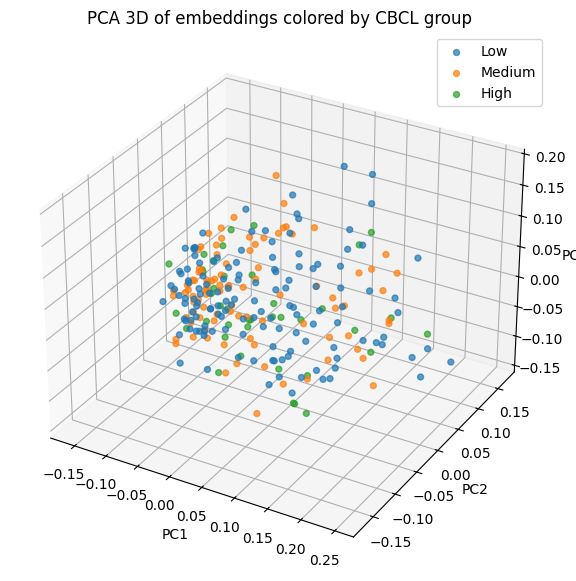

Explained variance ratio (PC1-3): [0.0728902  0.03137647 0.02963276] Total: 0.13389944


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# X_embeddings: (n, d)
# y_labels: array-like length n with values "Low","Medium","High"
from sklearn.preprocessing import normalize

normalized_X_embeddings = normalize(X_embeddings)   # (n, d)
scaler = StandardScaler()
scaled_X_embeddings = scaler.fit_transform(X_embeddings)
pca = PCA(n_components=3, random_state=42)
X_3d = pca.fit_transform(normalized_X_embeddings)

df3 = pd.DataFrame({
    "pc1": X_3d[:,0],
    "pc2": X_3d[:,1],
    "pc3": X_3d[:,2],
    "label": y_labels
})

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection="3d")

for lab in ["Low","Medium","High"]:
    m = df3["label"] == lab
    ax.scatter(df3.loc[m,"pc1"], df3.loc[m,"pc2"], df3.loc[m,"pc3"],
               s=18, alpha=0.7, label=lab)

ax.set_title("PCA 3D of embeddings colored by CBCL group")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()
plt.show()

print("Explained variance ratio (PC1-3):", pca.explained_variance_ratio_,
      "Total:", pca.explained_variance_ratio_.sum())

In [ ]:
!pip -q install umap-learn

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


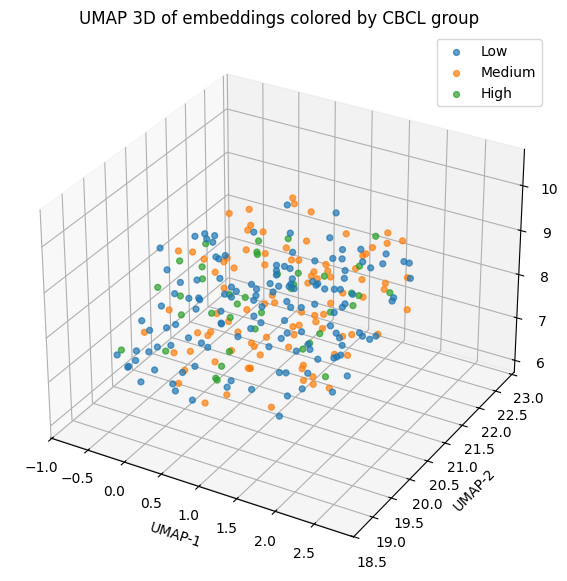

In [ ]:
import umap
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

reducer = umap.UMAP(
    n_components=3,
    n_neighbors=25,   # try 10–30
    min_dist=0.3,     # try 0.0–0.5
    metric="cosine",
    random_state=42
)

X_3d = reducer.fit_transform(normalized_X_embeddings)

df3 = pd.DataFrame({
    "u1": X_3d[:,0],
    "u2": X_3d[:,1],
    "u3": X_3d[:,2],
    "label": y_labels
})

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection="3d")

for lab in ["Low","Medium","High"]:
    m = df3["label"] == lab
    ax.scatter(df3.loc[m,"u1"], df3.loc[m,"u2"], df3.loc[m,"u3"],
               s=18, alpha=0.7, label=lab)

ax.set_title("UMAP 3D of embeddings colored by CBCL group")
ax.set_xlabel("UMAP-1")
ax.set_ylabel("UMAP-2")
ax.set_zlabel("UMAP-3")
ax.legend()
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca50 = PCA(n_components=50, random_state=42)
X50 = pca50.fit_transform(X_EER_embeddings)

print("Explained variance (50 PCs):", pca50.explained_variance_ratio_.sum())

Explained variance (50 PCs): 0.70302105


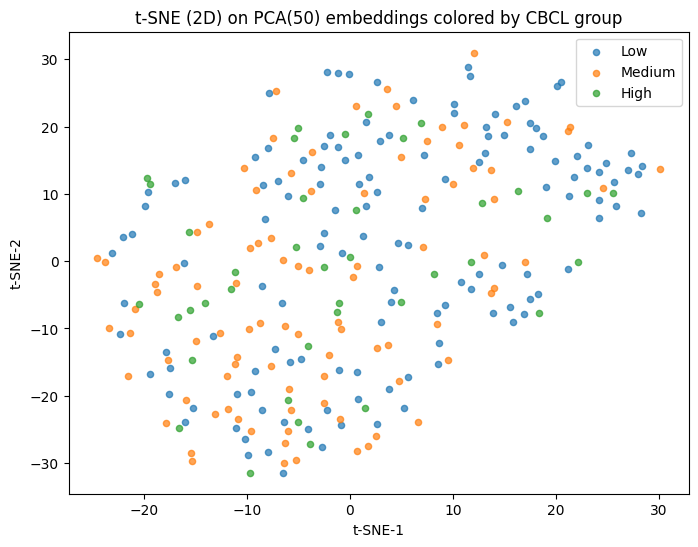

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne2 = TSNE(
    n_components=2,
    perplexity=15,       # try 10, 20, 30, 40
    learning_rate="auto",
    init="pca",
    metric="cosine",
    random_state=42
)

X2 = tsne2.fit_transform(X50)

df2 = pd.DataFrame({"x": X2[:,0], "y": X2[:,1], "label": y_labels})

plt.figure(figsize=(8,6))
for lab in ["Low","Medium","High"]:
    m = df2["label"] == lab
    plt.scatter(df2.loc[m,"x"], df2.loc[m,"y"], s=20, alpha=0.7, label=lab)

plt.title("t-SNE (2D) on PCA(50) embeddings colored by CBCL group")
plt.xlabel("t-SNE-1")
plt.ylabel("t-SNE-2")
plt.legend()
plt.show()

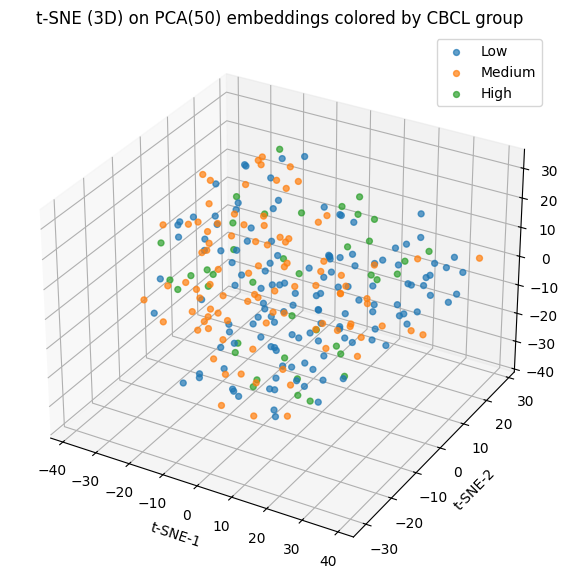

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

tsne3 = TSNE(
    n_components=3,
    perplexity=15,
    learning_rate="auto",
    init="pca",
    metric="cosine",
    random_state=42
)

X3 = tsne3.fit_transform(X50)

df3 = pd.DataFrame({"x": X3[:,0], "y": X3[:,1], "z": X3[:,2], "label": y_labels})

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection="3d")

for lab in ["Low","Medium","High"]:
    m = df3["label"] == lab
    ax.scatter(df3.loc[m,"x"], df3.loc[m,"y"], df3.loc[m,"z"], s=18, alpha=0.7, label=lab)

ax.set_title("t-SNE (3D) on PCA(50) embeddings colored by CBCL group")
ax.set_xlabel("t-SNE-1")
ax.set_ylabel("t-SNE-2")
ax.set_zlabel("t-SNE-3")
ax.legend()
plt.show()

In [ ]:
# --- STEP B: Train Model with Hyperparameter Optimization ---

# We will use Ridge Regression (Linear Model).
# It works well with high-dimensional embedding data and prevents overfitting.
regressor = LinearRegression()

# Define Hyperparameters to tune
# alpha: Regularization strength (higher = stronger regularization)
param_grid = {
    "alpha": np.logspace(-4, 1, 25)
}


print("\n--- Tuning Hyperparameters (Grid Search) ---")
grid_search = GridSearchCV(
    Ridge(),
    param_grid,
    cv=10,
    scoring="neg_mean_squared_error"
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Train the best model on full training set (GridSearch does this automatically, but to be explicit)
best_model.fit(X_train, y_train)

# --- STEP C: Evaluate against Naive Predictor ---

# 1. The Naive Predictor (Baseline)
# "Naive" usually means predicting the Mean or Median for everyone.
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)

# 2. Make Predictions
y_pred_model = best_model.predict(X_test)
y_pred_naive = dummy_regr.predict(X_test)

# 3. Calculate Metrics
rmse_model = np.sqrt(mean_squared_error(y_test, y_pred_model))
rmse_naive = np.sqrt(mean_squared_error(y_test, y_pred_naive))

r2_model = r2_score(y_test, y_pred_model)
r2_naive = r2_score(y_test, y_pred_naive)

# 4. Display Results
print("\n" + "="*40)
print("      MODEL EVALUATION RESULTS      ")
print("="*40)
print(f"{'Metric':<20} | {'Naive Predictor':<15} | {'Tuned Linear Model':<15}")
print("-" * 56)
print(f"{'RMSE (Lower is better)':<20} | {rmse_naive:.4f}          | {rmse_model:.4f}")
print(f"{'R2 (Higher is better)':<20} | {r2_naive:.4f}          | {r2_model:.4f}")
print("-" * 56)

if rmse_model < rmse_naive:
    print("\nSUCCESS: Your text-based model outperforms the naive guess!")
else:
    print("\nRESULT: The model did not beat the naive guess. Consider different features or models.")


--- Tuning Hyperparameters (Grid Search) ---
Best Parameters: {'alpha': np.float64(6.18965818891261)}

      MODEL EVALUATION RESULTS      
Metric               | Naive Predictor | Tuned Linear Model
--------------------------------------------------------
RMSE (Lower is better) | 14.8551          | 13.8895
R2 (Higher is better) | -0.0488          | 0.0831
--------------------------------------------------------

SUCCESS: Your text-based model outperforms the naive guess!


In [ ]:
data['CBCL_mean'] = np.mean(data[['CBCL_D_score', 'CBCL_A_score', 'CBCL_S_score']], axis=1)

(array([ 4.,  4., 14., 96., 91., 37., 14.,  7.,  2.,  1.]),
 array([-1.42431422,  2.92553511,  7.27538444, 11.62523377, 15.9750831 ,
        20.32493243, 24.67478176, 29.0246311 , 33.37448043, 37.72432976,
        42.07417909]),
 <BarContainer object of 10 artists>)

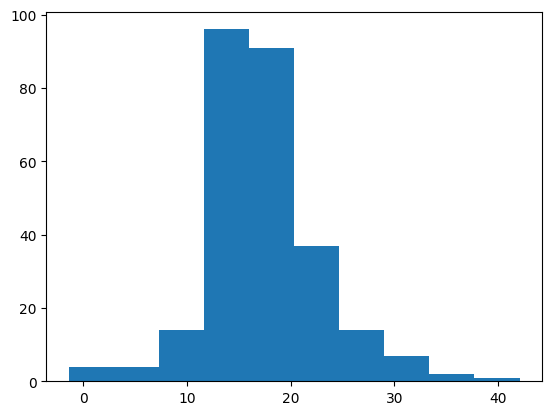

In [ ]:
plt.hist(best_model.predict(X_embeddings))

<Axes: >

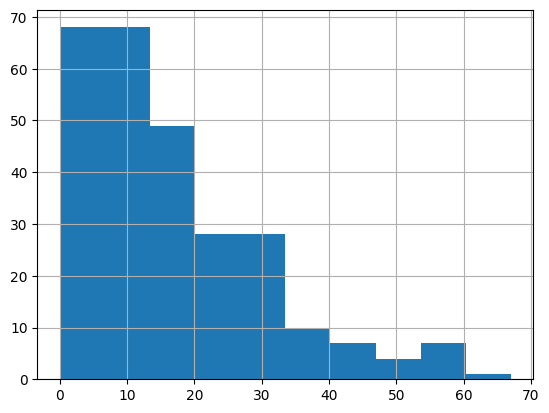

In [ ]:
data['CBCL_score'].hist()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=50,
    max_depth=None,
    min_samples_leaf=5,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# 3. Calculate Metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

r2_rf = r2_score(y_test, y_pred_rf)

# 4. Display Results
print("\n" + "="*40)
print("      MODEL EVALUATION RESULTS      ")
print("="*40)
print(f"{'Metric':<20} | {'Naive Predictor':<15} | {'Random Forest Model':<15}")
print("-" * 56)
print(f"{'RMSE (Lower is better)':<20} | {rmse_naive:.4f}          | {rmse_rf:.4f}")
print(f"{'R2 (Higher is better)':<20} | {r2_naive:.4f}          | {r2_rf:.4f}")
print("-" * 56)

if rmse_model < rmse_naive:
    print("\nSUCCESS: Your text-based model outperforms the naive guess!")
else:
    print("\nRESULT: The model did not beat the naive guess. Consider different features or models.")


      MODEL EVALUATION RESULTS      
Metric               | Naive Predictor | Random Forest Model
--------------------------------------------------------
RMSE (Lower is better) | 13.4418          | 13.9324
R2 (Higher is better) | -0.0027          | -0.0773
--------------------------------------------------------

SUCCESS: Your text-based model outperforms the naive guess!


In [ ]:
# --- STEP A: Encode Text to Vectors ---
# We use a multilingual model that supports Hebrew well.
# This replaces the need to manually average Word2Vec vectors.
print("Loading Embedding Model...")
model_name = 'paraphrase-multilingual-MiniLM-L12-v2'
embedding_model = SentenceTransformer(model_name)

# Ensure we are using the original Hebrew text column (not the lemmas)
# for context-aware embeddings.
# REPLACE 'text_column' with your actual column name.
text_col = 'lemmas'
target_col = 'CBCL_score'

# Encode the text
print("Encoding text features... (This may take a moment)")
# The model converts each text entry into a vector of numbers (e.g., 384 dimensions)
X_embeddings = embedding_model.encode(data[text_col].tolist(), show_progress_bar=True)

# Prepare Target
y = data[target_col].values

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, random_state=42)

# --- STEP B: Train Model with Hyperparameter Optimization ---

# We will use Ridge Regression (Linear Model).
# It works well with high-dimensional embedding data and prevents overfitting.
regressor = Ridge()

# Define Hyperparameters to tune
# alpha: Regularization strength (higher = stronger regularization)
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0, 200.0]
}

print("\n--- Tuning Hyperparameters (Grid Search) ---")
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Train the best model on full training set (GridSearch does this automatically, but to be explicit)
best_model.fit(X_train, y_train)

# --- STEP C: Evaluate against Naive Predictor ---

# 1. The Naive Predictor (Baseline)
# "Naive" usually means predicting the Mean or Median for everyone.
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)

# 2. Make Predictions
y_pred_model = best_model.predict(X_test)
y_pred_naive = dummy_regr.predict(X_test)

# 3. Calculate Metrics
rmse_model = np.sqrt(mean_squared_error(y_test, y_pred_model))
rmse_naive = np.sqrt(mean_squared_error(y_test, y_pred_naive))

r2_model = r2_score(y_test, y_pred_model)
r2_naive = r2_score(y_test, y_pred_naive)

# 4. Display Results
print("\n" + "="*40)
print("      MODEL EVALUATION RESULTS      ")
print("="*40)
print(f"{'Metric':<20} | {'Naive Predictor':<15} | {'Tuned Linear Model':<15}")
print("-" * 56)
print(f"{'RMSE (Lower is better)':<20} | {rmse_naive:.4f}          | {rmse_model:.4f}")
print(f"{'R2 (Higher is better)':<20} | {r2_naive:.4f}          | {r2_model:.4f}")
print("-" * 56)

if rmse_model < rmse_naive:
    print("\nSUCCESS: Your text-based model outperforms the naive guess!")
else:
    print("\nRESULT: The model did not beat the naive guess. Consider different features or models.")

Loading Embedding Model...
Encoding text features... (This may take a moment)


Batches:   0%|          | 0/9 [00:00<?, ?it/s]


--- Tuning Hyperparameters (Grid Search) ---
Best Parameters: {'alpha': 100.0}

      MODEL EVALUATION RESULTS      
Metric               | Naive Predictor | Tuned Linear Model
--------------------------------------------------------
RMSE (Lower is better) | 14.6634          | 14.7994
R2 (Higher is better) | -0.0279          | -0.0471
--------------------------------------------------------

RESULT: The model did not beat the naive guess. Consider different features or models.


In [ ]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- CONFIGURATION ---
TEXT_COL_1 = 'event_description' # Replace with actual column name
TEXT_COL_2 = 'letter_to_self'    # Replace with actual column name
TARGET_COL = 'CBCL_score'

# 1. Load Model
print("Loading Embedding Model...")
model_name = 'paraphrase-multilingual-MiniLM-L12-v2'
embedding_model = SentenceTransformer(model_name)

# 2. Encode Column 1 (Event)
print(f"Encoding {TEXT_COL_1}...")
# Fill NaNs with empty string to prevent errors
texts_1 = data[TEXT_COL_1].fillna('').tolist()
embeddings_1 = embedding_model.encode(texts_1, show_progress_bar=True)

# 3. Encode Column 2 (Letter)
print(f"Encoding {TEXT_COL_2}...")
texts_2 = data[TEXT_COL_2].fillna('').tolist()
embeddings_2 = embedding_model.encode(texts_2, show_progress_bar=True)

# 4. Concatenate Vectors
# Instead of one vector of size 384, we now have a combined vector of size 768 per person.
print("combining vectors...")
X_combined = np.hstack((embeddings_1, embeddings_2))

# Prepare Target
y = data[TARGET_COL].values

# 5. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# --- TRAIN & EVALUATE (Same as before) ---

regressor = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0, 200.0, 500.0]} # Added higher alpha for more features

print("\n--- Tuning Hyperparameters ---")
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Baseline
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)

# Predict
y_pred = best_model.predict(X_test)
y_naive = dummy.predict(X_test)

# Metrics
rmse_val = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_naive = np.sqrt(mean_squared_error(y_test, y_naive))
r2_val = r2_score(y_test, y_pred)

print("\n" + "="*40)
print("      EVALUATION RESULTS (Dual Vectors)      ")
print("="*40)
print(f"{'Metric':<20} | {'Naive':<15} | {'Dual-Vector Model':<15}")
print("-" * 56)
print(f"{'RMSE':<20} | {rmse_naive:.4f}          | {rmse_val:.4f}")
print(f"{'R2':<20} | {'0.0000'}          | {r2_val:.4f}")
print("-" * 56)

Loading Embedding Model...
Encoding event_description...


KeyError: 'event_description'

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Use 'max_depth' to prevent overfitting
rf_model = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
# Check R2 score for this new model

In [ ]:

# Metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_naive = np.sqrt(mean_squared_error(y_test, y_pred_naive))
r2_rf = r2_score(y_test, y_pred)

# 4. Display Results
print("\n" + "="*40)
print("      MODEL EVALUATION RESULTS      ")
print("="*40)
print(f"{'Metric':<20} | {'Naive Predictor':<15} | {'Random Forest Model':<15}")
print("-" * 56)
print(f"{'RMSE (Lower is better)':<20} | {rmse_naive:.4f}          | {rmse_rf:.4f}")
print(f"{'R2 (Higher is better)':<20} | {r2_naive:.4f}          | {r2_rf:.4f}")
print("-" * 56)


      MODEL EVALUATION RESULTS      
Metric               | Naive Predictor | Random Forest Model
--------------------------------------------------------
RMSE (Lower is better) | 13.4418          | 13.9982
R2 (Higher is better) | -0.0027          | -0.0875
--------------------------------------------------------


---

---

In [ ]:
data['Event_words_lst'] = data['Event'].apply(clean_text_basic).apply(tokenize_hebrew)


data['Event_words_lst']

In [ ]:
data['Event_top_10_words'] = data['Event_words_lst'].apply(get_top_n_words)

data['Event_top_10_words']

In [ ]:
from collections import Counter
from itertools import chain

# Flatten all words in Event_top_10_words
# Each row is a list of (word, count) tuples, we only take the word
all_top_words = list(chain.from_iterable([[w for w, c in lst] for lst in data['Event_top_10_words']]))

# Count frequency
word_counter = Counter(all_top_words)

# Get the 10 most common words
top10_words_overall = word_counter.most_common(10)

print("Top 10 most common words across all events:")
for word, freq in top10_words_overall:
    print(f"{word}: {freq}")

In [ ]:
all_events_txt = ''

for txt in data['Event']:
  all_events_txt += txt

In [ ]:
get_top_n_words(tokenize_hebrew(all_events_txt), n=10)

In [ ]:

# Create binary columns: 1 if word appears in Event_words_lst, 0 otherwise
for word in top_words:
    data[f'word_{word}'] = data['Event_words_lst'].apply(lambda lst: int(word in lst))

# Compare mean war_exposure_score for events with vs without each word
comparison = []
for word in top_words:
    col = f'word_{word}'
    mean_with = data.loc[data[col] == 1, 'war_exposure_score'].mean()
    mean_without = data.loc[data[col] == 0, 'war_exposure_score'].mean()
    comparison.append({
        'word': word,
        'WarExposure_with_word': mean_with,
        'WarExposure_without_word': mean_without
    })

comparison_df = pd.DataFrame(comparison)

# Melt for plotting
comparison_melted = comparison_df.melt(
    id_vars='word',
    value_vars=['WarExposure_with_word', 'WarExposure_without_word'],
    var_name='Condition', value_name='WarExposure_score'
)

# Clean names for plot
comparison_melted['Condition'] = comparison_melted['Condition'].map({
    'WarExposure_with_word': 'With Word',
    'WarExposure_without_word': 'Without Word'
})

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=comparison_melted, x='WarExposure_score', y='word', hue='Condition')
plt.xlabel('Mean War Exposure Score')
plt.ylabel('Word')
plt.title('War Exposure Scores by Presence of Top 10 Event Words')
plt.legend(title='')
plt.tight_layout()
plt.show()



---


---